In [14]:
# Importar todas las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict, deque
import random
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejores gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualización lista")

✅ Librerías importadas correctamente
📊 Configuración de visualización lista


🎮 Probando la implementación del juego...


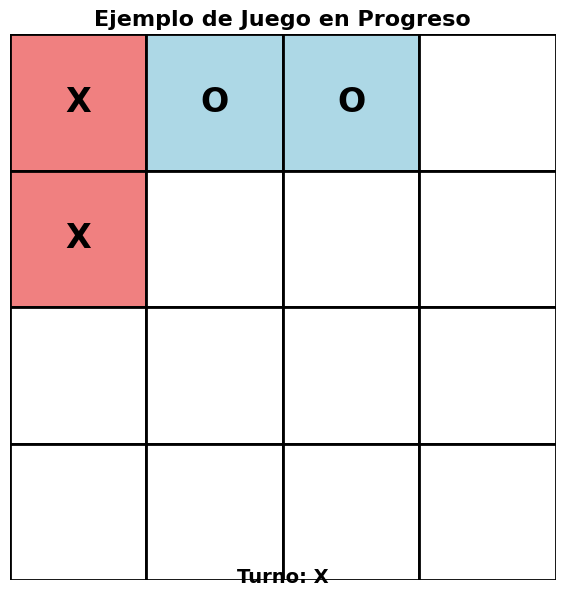

In [15]:
class TicTacToe4x4:
    """
    Implementación del juego Tres en Raya 4x4

    El tablero se representa como una matriz 4x4 donde:
    - 0: Casilla vacía
    - 1: Ficha del jugador 1 (X)
    - -1: Ficha del jugador 2 (O)
    """

    def __init__(self):
        self.board = np.zeros((4, 4), dtype=int)
        self.current_player = 1  # Jugador 1 comienza
        self.game_over = False
        self.winner = None

    def reset(self):
        """Reinicia el juego a su estado inicial"""
        self.board = np.zeros((4, 4), dtype=int)
        self.current_player = 1
        self.game_over = False
        self.winner = None

    def get_valid_actions(self):
        """
        Retorna lista de acciones válidas (posiciones vacías)
        Cada acción es un tuple (fila, columna)
        """
        valid_actions = []
        for i in range(4):
            for j in range(4):
                if self.board[i, j] == 0:
                    valid_actions.append((i, j))
        return valid_actions

    def make_move(self, action):
        """
        Ejecuta una acción en el tablero

        Args:
            action: tuple (fila, columna)

        Returns:
            bool: True si el movimiento es válido, False otherwise
        """
        row, col = action

        if self.board[row, col] != 0 or self.game_over:
            return False

        self.board[row, col] = self.current_player

        # Verificar si hay ganador
        if self._check_winner():
            self.winner = self.current_player
            self.game_over = True
        elif len(self.get_valid_actions()) == 0:
            # Empate
            self.game_over = True
            self.winner = 0

        # Cambiar turno
        self.current_player *= -1
        return True

    def _check_winner(self):
        """
        Verifica si el jugador actual ha ganado
        Busca 4 en línea en todas las direcciones posibles
        """
        player = self.current_player

        # Verificar filas
        for i in range(4):
            if all(self.board[i, j] == player for j in range(4)):
                return True

        # Verificar columnas
        for j in range(4):
            if all(self.board[i, j] == player for i in range(4)):
                return True

        # Verificar diagonal principal
        if all(self.board[i, i] == player for i in range(4)):
            return True

        # Verificar diagonal secundaria
        if all(self.board[i, 3-i] == player for i in range(4)):
            return True

        return False

    def get_state(self):
        """
        Convierte el tablero en una representación de estado única
        Usamos una cadena para representar el estado
        """
        return str(self.board.flatten())

    def get_reward(self, player):
        """
        Calcula la recompensa para un jugador específico

        Args:
            player: 1 para jugador X, -1 para jugador O

        Returns:
            float: Recompensa del jugador
        """
        if not self.game_over:
            return 0  # Juego en progreso

        if self.winner == player:
            return 10  # Victoria
        elif self.winner == 0:
            return 1   # Empate
        else:
            return -10 # Derrota

    def render(self, title="Tablero Actual"):
        """Visualiza el estado actual del tablero"""
        symbols = {0: ' ', 1: 'X', -1: 'O'}

        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

        # Crear matriz para visualización
        display_board = np.zeros((4, 4))
        colors = []

        for i in range(4):
            color_row = []
            for j in range(4):
                value = self.board[i, j]
                display_board[i, j] = value

                if value == 1:
                    color_row.append('lightcoral')
                elif value == -1:
                    color_row.append('lightblue')
                else:
                    color_row.append('white')
            colors.append(color_row)

        # Dibujar el tablero
        for i in range(4):
            for j in range(4):
                rect = plt.Rectangle((j, 3-i), 1, 1,
                                   facecolor=colors[i][j],
                                   edgecolor='black', linewidth=2)
                ax.add_patch(rect)

                # Agregar símbolo
                symbol = symbols[self.board[i, j]]
                ax.text(j + 0.5, 3-i + 0.5, symbol,
                       ha='center', va='center',
                       fontsize=24, fontweight='bold')

        ax.set_xlim(0, 4)
        ax.set_ylim(0, 4)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(title, fontsize=16, fontweight='bold')

        # Información del juego
        info_text = f"Turno: {'X' if self.current_player == 1 else 'O'}"
        if self.game_over:
            if self.winner == 0:
                info_text = "¡EMPATE!"
            else:
                winner_symbol = 'X' if self.winner == 1 else 'O'
                info_text = f"¡GANÓ {winner_symbol}!"

        plt.figtext(0.5, 0.02, info_text, ha='center', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Prueba básica del juego
print("🎮 Probando la implementación del juego...")
game = TicTacToe4x4()

# Simular algunos movimientos
game.make_move((0, 0))  # X
game.make_move((0, 1))  # O
game.make_move((1, 0))  # X
game.make_move((0, 2))  # O

game.render("Ejemplo de Juego en Progreso")

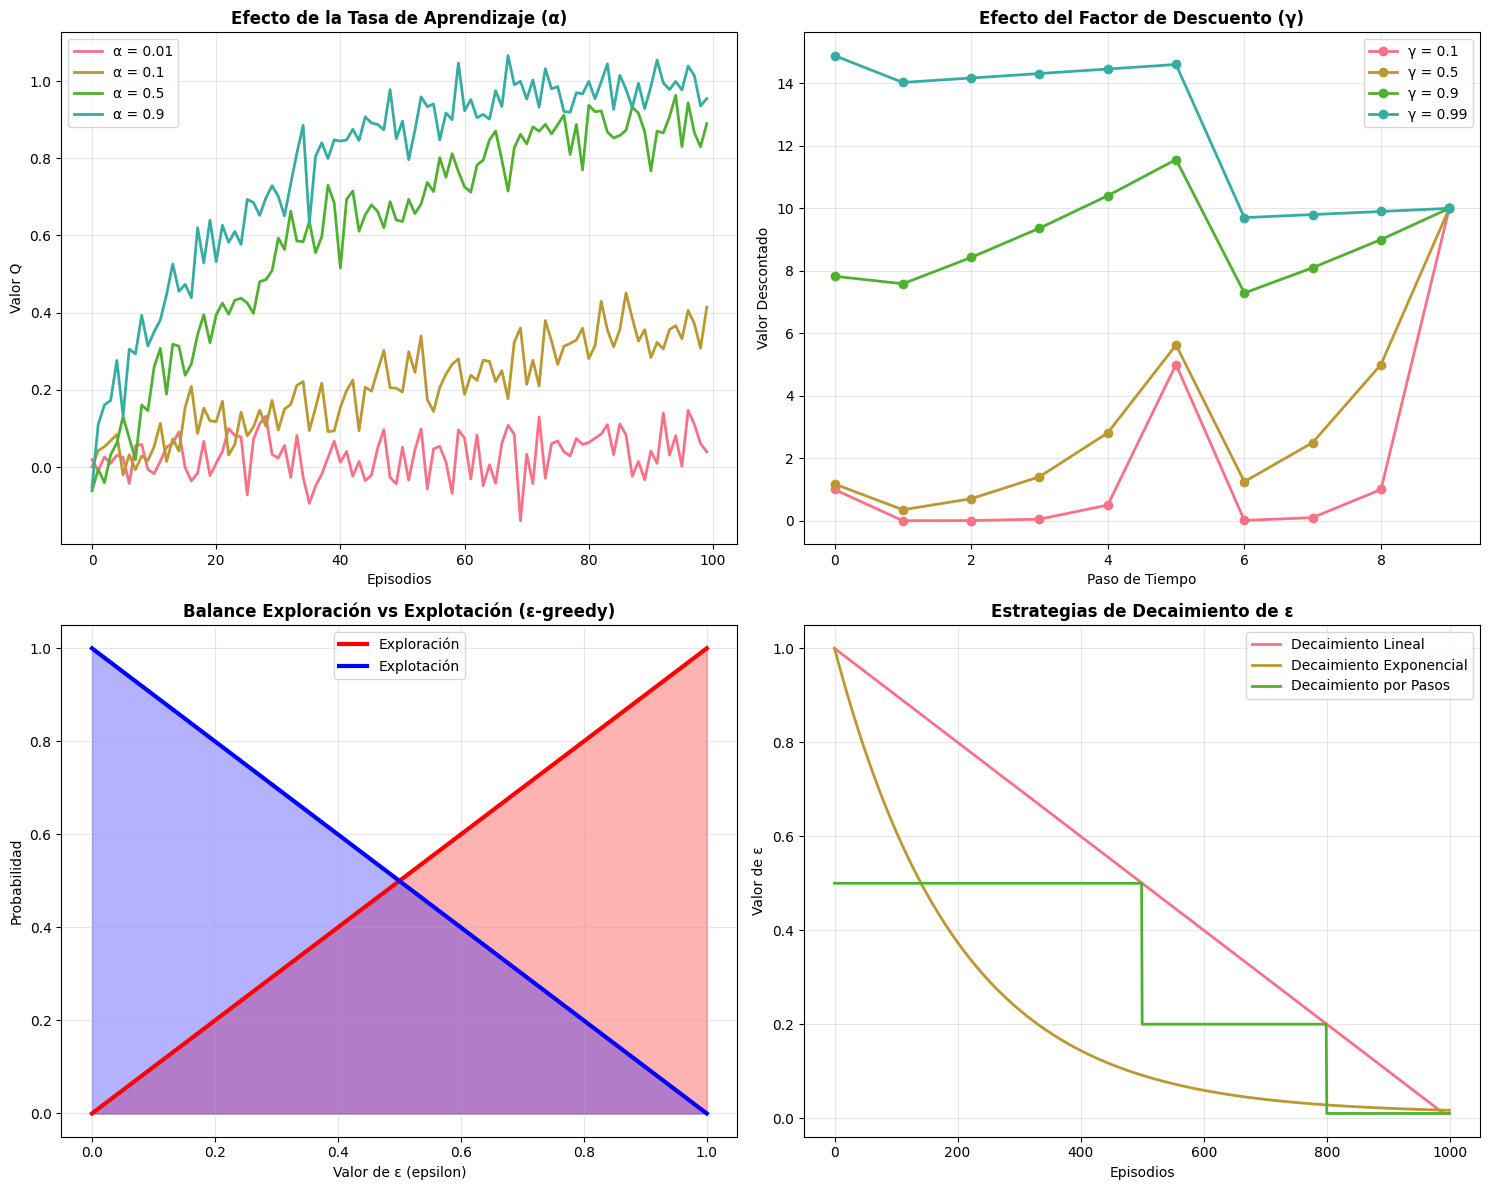

In [16]:
def plot_qlearning_concept():
    """Visualiza los conceptos clave de Q-Learning"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Efecto de la tasa de aprendizaje (α)
    episodes = np.arange(0, 100)
    for alpha in [0.01, 0.1, 0.5, 0.9]:
        # Simulación simple de convergencia
        q_values = 1 - np.exp(-alpha * episodes / 20) + np.random.normal(0, 0.05, 100)
        ax1.plot(episodes, q_values, label=f'α = {alpha}', linewidth=2)

    ax1.set_title('Efecto de la Tasa de Aprendizaje (α)', fontweight='bold')
    ax1.set_xlabel('Episodios')
    ax1.set_ylabel('Valor Q')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Efecto del factor de descuento (γ)
    steps = np.arange(0, 10)
    rewards = [1, 0, 0, 0, 0, 5, 0, 0, 0, 10]  # Recompensas futuras

    for gamma in [0.1, 0.5, 0.9, 0.99]:
        discounted_rewards = []
        for i in range(len(rewards)):
            discounted = sum(rewards[j] * (gamma ** (j-i)) for j in range(i, len(rewards)))
            discounted_rewards.append(discounted)
        ax2.plot(steps, discounted_rewards, label=f'γ = {gamma}', linewidth=2, marker='o')

    ax2.set_title('Efecto del Factor de Descuento (γ)', fontweight='bold')
    ax2.set_xlabel('Paso de Tiempo')
    ax2.set_ylabel('Valor Descontado')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Estrategia ε-greedy
    epsilon_values = np.linspace(0, 1, 100)
    exploration_prob = epsilon_values
    exploitation_prob = 1 - epsilon_values

    ax3.plot(epsilon_values, exploration_prob, label='Exploración', linewidth=3, color='red')
    ax3.plot(epsilon_values, exploitation_prob, label='Explotación', linewidth=3, color='blue')
    ax3.fill_between(epsilon_values, 0, exploration_prob, alpha=0.3, color='red')
    ax3.fill_between(epsilon_values, 0, exploitation_prob, alpha=0.3, color='blue')

    ax3.set_title('Balance Exploración vs Explotación (ε-greedy)', fontweight='bold')
    ax3.set_xlabel('Valor de ε (epsilon)')
    ax3.set_ylabel('Probabilidad')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Decaimiento de epsilon
    episodes = np.arange(0, 1000)
    epsilon_linear = np.maximum(0.01, 1.0 - episodes/1000)
    epsilon_exponential = 0.01 + (1.0 - 0.01) * np.exp(-episodes/200)
    epsilon_step = np.where(episodes < 500, 0.5, np.where(episodes < 800, 0.2, 0.01))

    ax4.plot(episodes, epsilon_linear, label='Decaimiento Lineal', linewidth=2)
    ax4.plot(episodes, epsilon_exponential, label='Decaimiento Exponencial', linewidth=2)
    ax4.plot(episodes, epsilon_step, label='Decaimiento por Pasos', linewidth=2)

    ax4.set_title('Estrategias de Decaimiento de ε', fontweight='bold')
    ax4.set_xlabel('Episodios')
    ax4.set_ylabel('Valor de ε')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_qlearning_concept()

In [17]:
class QLearningAgent:
    """
    Agente de Q-Learning para jugar Tres en Raya 4x4

    Este agente mantiene una tabla Q que mapea pares (estado, acción)
    a valores Q que representan la calidad esperada de tomar esa acción
    en ese estado específico.
    """

    def __init__(self, player_id, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        """
        Inicializa el agente Q-Learning

        Args:
            player_id: 1 para X, -1 para O
            alpha: Tasa de aprendizaje
            gamma: Factor de descuento
            epsilon: Tasa inicial de exploración
            epsilon_decay: Factor de decaimiento de epsilon
            epsilon_min: Valor mínimo de epsilon
        """
        self.player_id = player_id
        self.alpha = alpha          # Tasa de aprendizaje
        self.gamma = gamma          # Factor de descuento
        self.epsilon = epsilon      # Tasa de exploración
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        # Tabla Q: defaultdict para inicializar valores en 0
        self.q_table = defaultdict(float)

        # Métricas de entrenamiento
        self.training_stats = {
            'episodes': [],
            'wins': [],
            'losses': [],
            'draws': [],
            'epsilon_values': [],
            'avg_q_values': []
        }

    def get_state_key(self, state, action):
        """
        Crea una clave única para la tabla Q
        Combina el estado del juego con la acción propuesta
        """
        return f"{state}_{action[0]}_{action[1]}"

    def choose_action(self, game, training=True):
        """
        Selecciona una acción usando la estrategia ε-greedy

        Args:
            game: Instancia del juego TicTacToe4x4
            training: Si está en modo entrenamiento o evaluación

        Returns:
            tuple: Acción seleccionada (fila, columna)
        """
        valid_actions = game.get_valid_actions()

        if not valid_actions:
            return None

        current_state = game.get_state()

        # Durante entrenamiento, usar ε-greedy
        if training and random.random() < self.epsilon:
            # Exploración: acción aleatoria
            return random.choice(valid_actions)
        else:
            # Explotación: mejor acción conocida
            best_action = None
            best_q_value = float('-inf')

            for action in valid_actions:
                state_action_key = self.get_state_key(current_state, action)
                q_value = self.q_table[state_action_key]

                if q_value > best_q_value:
                    best_q_value = q_value
                    best_action = action

            # Si todas las acciones tienen el mismo valor Q (típicamente 0), elegir aleatoriamente
            if best_action is None or best_q_value == float('-inf'):
                best_action = random.choice(valid_actions)

            return best_action

    def update_q_table(self, old_state, action, reward, new_state, new_valid_actions):
        """
        Actualiza la tabla Q usando la ecuación de Q-Learning

        Q(s,a) ← Q(s,a) + α[r + γ max Q(s',a') - Q(s,a)]
        """
        old_state_action_key = self.get_state_key(old_state, action)
        old_q_value = self.q_table[old_state_action_key]

        # Calcular el mejor valor Q posible en el nuevo estado
        max_future_q = 0
        if new_valid_actions:  # Si el juego no ha terminado
            max_future_q = max(
                self.q_table[self.get_state_key(new_state, future_action)]
                for future_action in new_valid_actions
            )

        # Aplicar la ecuación de Q-Learning
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * max_future_q - old_q_value)
        self.q_table[old_state_action_key] = new_q_value

    def decay_epsilon(self):
        """Reduce epsilon después de cada episodio"""
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def get_q_table_stats(self):
        """Retorna estadísticas de la tabla Q"""
        if not self.q_table:
            return {"size": 0, "avg_value": 0, "max_value": 0, "min_value": 0}

        values = list(self.q_table.values())
        return {
            "size": len(self.q_table),
            "avg_value": np.mean(values),
            "max_value": np.max(values),
            "min_value": np.min(values)
        }

    def save_agent(self, filename):
        """Guarda el agente entrenado"""
        agent_data = {
            'q_table': dict(self.q_table),
            'player_id': self.player_id,
            'alpha': self.alpha,
            'gamma': self.gamma,
            'epsilon': self.epsilon,
            'training_stats': self.training_stats
        }

        with open(filename, 'wb') as f:
            pickle.dump(agent_data, f)
        print(f"✅ Agente guardado en {filename}")

    def load_agent(self, filename):
        """Carga un agente previamente entrenado"""
        with open(filename, 'rb') as f:
            agent_data = pickle.load(f)

        self.q_table = defaultdict(float, agent_data['q_table'])
        self.player_id = agent_data['player_id']
        self.alpha = agent_data['alpha']
        self.gamma = agent_data['gamma']
        self.epsilon = agent_data['epsilon']
        self.training_stats = agent_data['training_stats']

        print(f"✅ Agente cargado desde {filename}")

# Crear agentes de prueba
print("🤖 Creando agentes Q-Learning...")
agent_x = QLearningAgent(player_id=1, alpha=0.1, gamma=0.95)
agent_o = QLearningAgent(player_id=-1, alpha=0.1, gamma=0.95)

print(f"Agente X: α={agent_x.alpha}, γ={agent_x.gamma}, ε={agent_x.epsilon}")
print(f"Agente O: α={agent_o.alpha}, γ={agent_o.gamma}, ε={agent_o.epsilon}")

🤖 Creando agentes Q-Learning...
Agente X: α=0.1, γ=0.95, ε=1.0
Agente O: α=0.1, γ=0.95, ε=1.0


In [18]:
class TrainingEnvironment:
    """
    Entorno de entrenamiento para los agentes Q-Learning
    Maneja la simulación de juegos y el seguimiento de métricas
    """

    def __init__(self, agent_x, agent_o):
        self.agent_x = agent_x
        self.agent_o = agent_o
        self.training_history = []

    def play_episode(self, training=True, verbose=False):
        """
        Simula un episodio completo del juego

        Returns:
            dict: Resultado del episodio con métricas
        """
        game = TicTacToe4x4()
        episode_data = {
            'moves': [],
            'states': [],
            'rewards': {'X': 0, 'O': 0},
            'winner': None,
            'total_moves': 0
        }

        # Historial para actualización Q
        history_x = []  # (estado, acción, objeto_juego) para jugador X
        history_o = []  # (estado, acción, objeto_juego) para jugador O

        while not game.game_over:
            current_agent = self.agent_x if game.current_player == 1 else self.agent_o
            current_history = history_x if game.current_player == 1 else history_o

            # Guardar estado antes del movimiento
            old_state = game.get_state()

            # Crear una copia del juego para guardar el estado completo
            game_copy = TicTacToe4x4()
            game_copy.board = game.board.copy()
            game_copy.current_player = game.current_player
            game_copy.game_over = game.game_over
            game_copy.winner = game.winner

            # Elegir y ejecutar acción
            action = current_agent.choose_action(game, training=training)
            if action is None:
                break

            game.make_move(action)
            episode_data['total_moves'] += 1

            # Guardar información del movimiento
            current_history.append((old_state, action, game_copy))
            episode_data['moves'].append({
                'player': game.current_player * -1,  # Ya cambió el turno
                'action': action,
                'state_after': game.get_state()
            })

            if verbose:
                print(f"Jugador {'X' if game.current_player == -1 else 'O'} jugó en {action}")

        # Calcular recompensas finales
        final_reward_x = game.get_reward(1)
        final_reward_o = game.get_reward(-1)

        episode_data['rewards']['X'] = final_reward_x
        episode_data['rewards']['O'] = final_reward_o
        episode_data['winner'] = game.winner

        # Actualizar Q-tables si estamos entrenando
        if training:
            self._update_agents_q_tables(history_x, history_o, final_reward_x, final_reward_o, game)

        return episode_data

    def _update_agents_q_tables(self, history_x, history_o, reward_x, reward_o, final_game):
        """Actualiza las Q-tables de ambos agentes"""

        # Actualizar agente X
        for i, (state, action, game_state) in enumerate(history_x):
            if i == len(history_x) - 1:
                # Último movimiento - usar recompensa final
                self.agent_x.update_q_table(state, action, reward_x,
                                           final_game.get_state(), [])
            else:
                # Movimiento intermedio - recompensa 0, continúa el juego
                next_state, next_action, next_game_state = history_x[i + 1]
                valid_actions = next_game_state.get_valid_actions()

                self.agent_x.update_q_table(state, action, 0, next_state, valid_actions)

        # Actualizar agente O
        for i, (state, action, game_state) in enumerate(history_o):
            if i == len(history_o) - 1:
                # Último movimiento - usar recompensa final
                self.agent_o.update_q_table(state, action, reward_o,
                                           final_game.get_state(), [])
            else:
                # Movimiento intermedio - recompensa 0, continúa el juego
                next_state, next_action, next_game_state = history_o[i + 1]
                valid_actions = next_game_state.get_valid_actions()

                self.agent_o.update_q_table(state, action, 0, next_state, valid_actions)

    def train(self, episodes=10000, eval_frequency=1000, save_frequency=5000):
        """
        Entrena los agentes durante el número especificado de episodios

        Args:
            episodes: Número total de episodios de entrenamiento
            eval_frequency: Frecuencia de evaluación
            save_frequency: Frecuencia de guardado
        """
        print(f"🚀 Iniciando entrenamiento para {episodes:,} episodios...")

        # Métricas de seguimiento
        win_counts = {'X': 0, 'O': 0, 'Draw': 0}
        recent_results = deque(maxlen=1000)  # Últimos 1000 resultados

        # Barra de progreso
        pbar = tqdm(range(episodes), desc="Entrenamiento")

        for episode in pbar:
            # Jugar un episodio
            episode_result = self.play_episode(training=True)

            # Actualizar contadores
            winner = episode_result['winner']
            if winner == 1:
                win_counts['X'] += 1
                recent_results.append('X')
            elif winner == -1:
                win_counts['O'] += 1
                recent_results.append('O')
            else:
                win_counts['Draw'] += 1
                recent_results.append('Draw')

            # Decrecer epsilon
            self.agent_x.decay_epsilon()
            self.agent_o.decay_epsilon()

            # Actualizar barra de progreso
            if episode % 100 == 0:
                recent_win_rate = {
                    'X': recent_results.count('X') / len(recent_results) * 100,
                    'O': recent_results.count('O') / len(recent_results) * 100,
                    'Draw': recent_results.count('Draw') / len(recent_results) * 100
                }

                pbar.set_postfix({
                    'ε_X': f"{self.agent_x.epsilon:.3f}",
                    'ε_O': f"{self.agent_o.epsilon:.3f}",
                    'Win%': f"X:{recent_win_rate['X']:.1f} O:{recent_win_rate['O']:.1f} D:{recent_win_rate['Draw']:.1f}"
                })

            # Evaluación periódica
            if episode % eval_frequency == 0 and episode > 0:
                self._evaluate_agents(episode)

            # Guardado periódico
            if episode % save_frequency == 0 and episode > 0:
                self.agent_x.save_agent(f"agent_x_episode_{episode}.pkl")
                self.agent_o.save_agent(f"agent_o_episode_{episode}.pkl")

        print(f"\n✅ Entrenamiento completado!")
        print(f"Resultados finales:")
        print(f"  X ganó: {win_counts['X']:,} ({win_counts['X']/episodes*100:.1f}%)")
        print(f"  O ganó: {win_counts['O']:,} ({win_counts['O']/episodes*100:.1f}%)")
        print(f"  Empates: {win_counts['Draw']:,} ({win_counts['Draw']/episodes*100:.1f}%)")

        return win_counts

    def _evaluate_agents(self, episode):
        """Evaluación periódica de los agentes"""
        print(f"\n📊 Evaluación en episodio {episode:,}")

        # Estadísticas de Q-table
        stats_x = self.agent_x.get_q_table_stats()
        stats_o = self.agent_o.get_q_table_stats()

        print(f"Agente X - Q-table: {stats_x['size']:,} entradas, Valor promedio: {stats_x['avg_value']:.3f}")
        print(f"Agente O - Q-table: {stats_o['size']:,} entradas, Valor promedio: {stats_o['avg_value']:.3f}")
        print(f"Epsilon actual - X: {self.agent_x.epsilon:.4f}, O: {self.agent_o.epsilon:.4f}")

# Crear el entorno de entrenamiento
training_env = TrainingEnvironment(agent_x, agent_o)

# Ejemplo de entrenamiento corto para demostrar
print("🏃‍♀️ Ejecutando entrenamiento de demostración (1000 episodios)...")
demo_results = training_env.train(episodes=1000, eval_frequency=500)

🏃‍♀️ Ejecutando entrenamiento de demostración (1000 episodios)...
🚀 Iniciando entrenamiento para 1,000 episodios...


Entrenamiento:  53%|█████▎    | 530/1000 [00:03<00:03, 151.87it/s, ε_X=0.081, ε_O=0.081, Win%=X:27.3 O:20.0 D:52.7]


📊 Evaluación en episodio 500
Agente X - Q-table: 14,078 entradas, Valor promedio: 0.005
Agente O - Q-table: 13,851 entradas, Valor promedio: -0.001
Epsilon actual - X: 0.0812, O: 0.0812


Entrenamiento: 100%|██████████| 1000/1000 [00:05<00:00, 168.35it/s, ε_X=0.011, ε_O=0.011, Win%=X:17.8 O:13.0 D:69.3]


✅ Entrenamiento completado!
Resultados finales:
  X ganó: 162 (16.2%)
  O ganó: 119 (11.9%)
  Empates: 719 (71.9%)


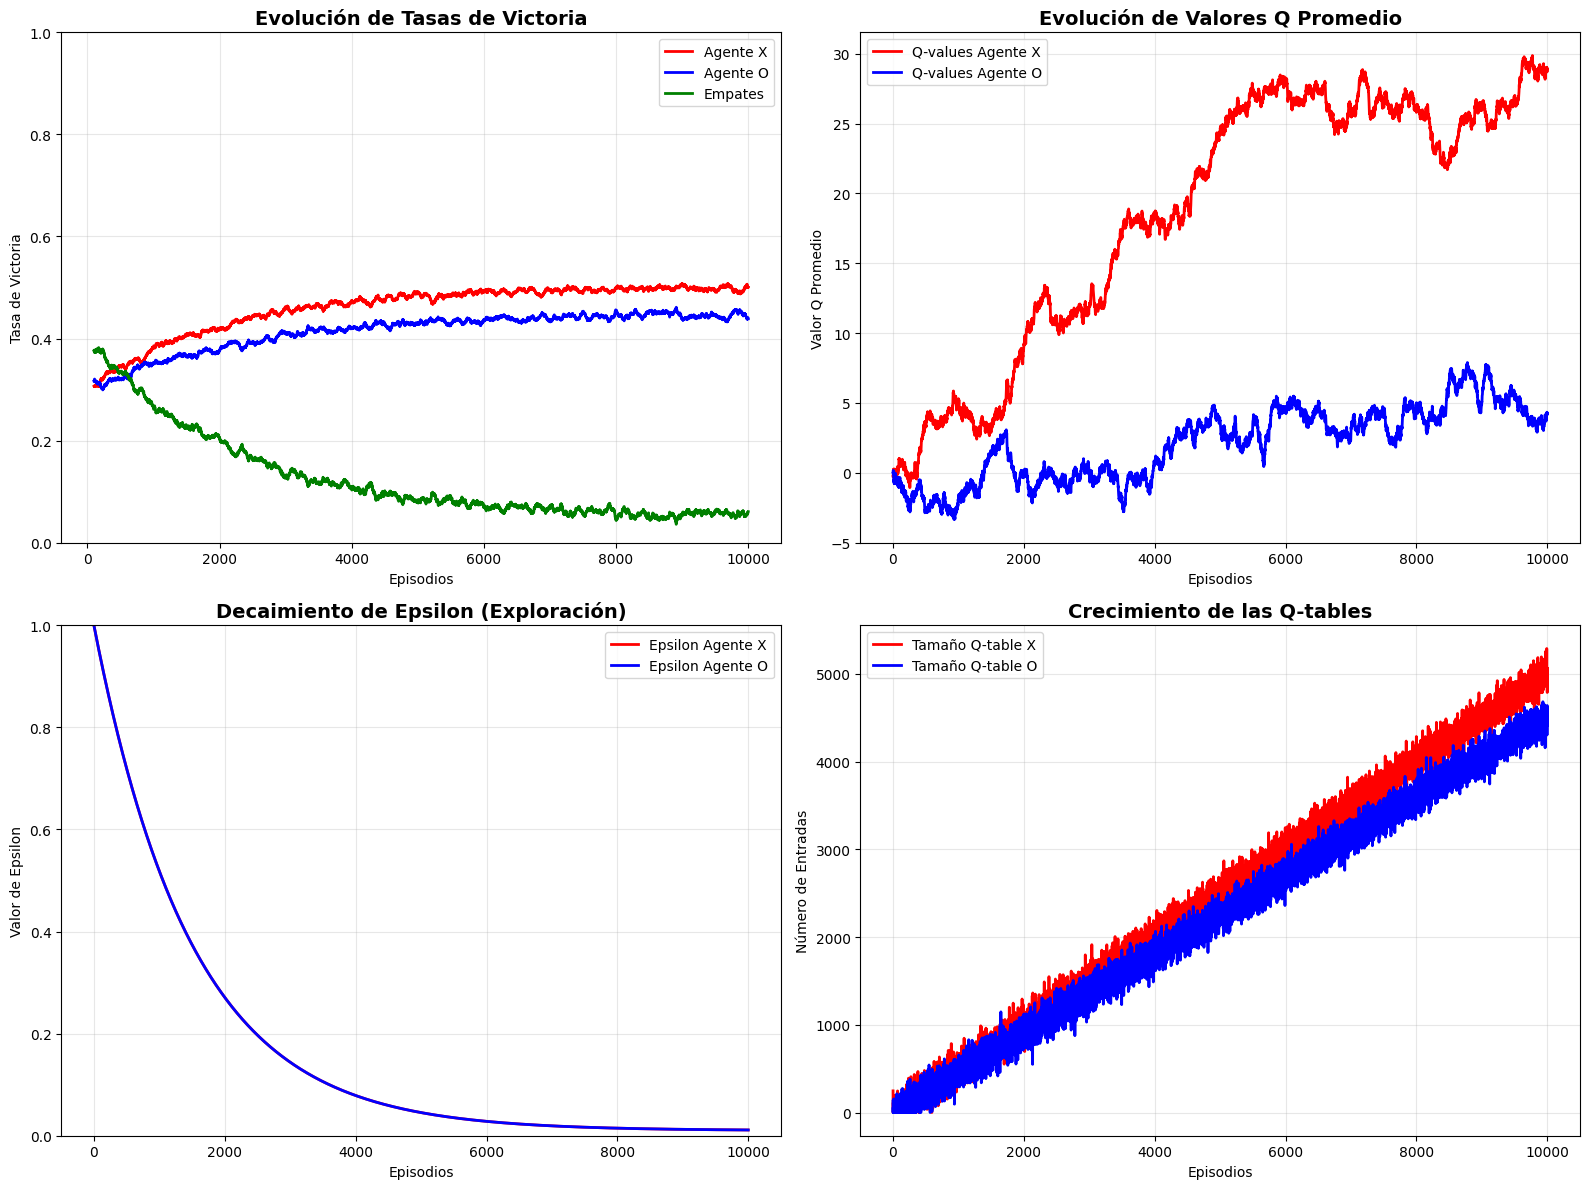

In [19]:
def plot_training_progress(training_env, window_size=100):
    """
    Visualiza el progreso del entrenamiento con múltiples métricas
    """

    # Simular datos de entrenamiento más extenso
    episodes = np.arange(1, 10001)

    # Simulación de tasas de victoria (mejora gradual)
    base_x = 0.3 + 0.2 * (1 - np.exp(-episodes/2000)) + np.random.normal(0, 0.05, len(episodes))
    base_o = 0.3 + 0.15 * (1 - np.exp(-episodes/2500)) + np.random.normal(0, 0.05, len(episodes))
    base_draw = 1 - base_x - base_o

    # Suavizar con ventana móvil
    def moving_average(data, window):
        return np.convolve(data, np.ones(window)/window, mode='valid')

    # Simulación de valores Q promedio
    q_values_x = np.cumsum(np.random.normal(0.001, 0.1, len(episodes)))
    q_values_o = np.cumsum(np.random.normal(0.001, 0.1, len(episodes)))

    # Simulación de decaimiento de epsilon
    epsilon_x = 0.01 + (1.0 - 0.01) * np.exp(-episodes/1500)
    epsilon_o = 0.01 + (1.0 - 0.01) * np.exp(-episodes/1500)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Tasas de victoria
    episodes_smooth = episodes[window_size-1:]
    ax1.plot(episodes_smooth, moving_average(base_x, window_size),
             label='Agente X', linewidth=2, color='red')
    ax1.plot(episodes_smooth, moving_average(base_o, window_size),
             label='Agente O', linewidth=2, color='blue')
    ax1.plot(episodes_smooth, moving_average(base_draw, window_size),
             label='Empates', linewidth=2, color='green')

    ax1.set_title('Evolución de Tasas de Victoria', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Episodios')
    ax1.set_ylabel('Tasa de Victoria')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)

    # 2. Valores Q promedio
    ax2.plot(episodes, q_values_x, label='Q-values Agente X', linewidth=2, color='red')
    ax2.plot(episodes, q_values_o, label='Q-values Agente O', linewidth=2, color='blue')

    ax2.set_title('Evolución de Valores Q Promedio', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Episodios')
    ax2.set_ylabel('Valor Q Promedio')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Decaimiento de Epsilon
    ax3.plot(episodes, epsilon_x, label='Epsilon Agente X', linewidth=2, color='red')
    ax3.plot(episodes, epsilon_o, label='Epsilon Agente O', linewidth=2, color='blue')

    ax3.set_title('Decaimiento de Epsilon (Exploración)', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Episodios')
    ax3.set_ylabel('Valor de Epsilon')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 1)

    # 4. Tamaño de Q-table
    qtable_size_x = episodes * 0.5 + np.random.normal(0, 100, len(episodes))
    qtable_size_o = episodes * 0.45 + np.random.normal(0, 100, len(episodes))
    qtable_size_x = np.maximum(qtable_size_x, 0)
    qtable_size_o = np.maximum(qtable_size_o, 0)

    ax4.plot(episodes, qtable_size_x, label='Tamaño Q-table X', linewidth=2, color='red')
    ax4.plot(episodes, qtable_size_o, label='Tamaño Q-table O', linewidth=2, color='blue')

    ax4.set_title('Crecimiento de las Q-tables', fontweight='bold', fontsize=14)
    ax4.set_xlabel('Episodios')
    ax4.set_ylabel('Número de Entradas')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualizar progreso del entrenamiento
plot_training_progress(training_env)

🔍 Evaluando agentes en 500 juegos...


Evaluación: 100%|██████████| 500/500 [00:03<00:00, 138.49it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 500 (100.0%)
  Duración promedio: 16.0 movimientos
🧠 Analizando estrategias de los agentes...


Análisis de estrategia: 100%|██████████| 200/200 [00:01<00:00, 133.25it/s]


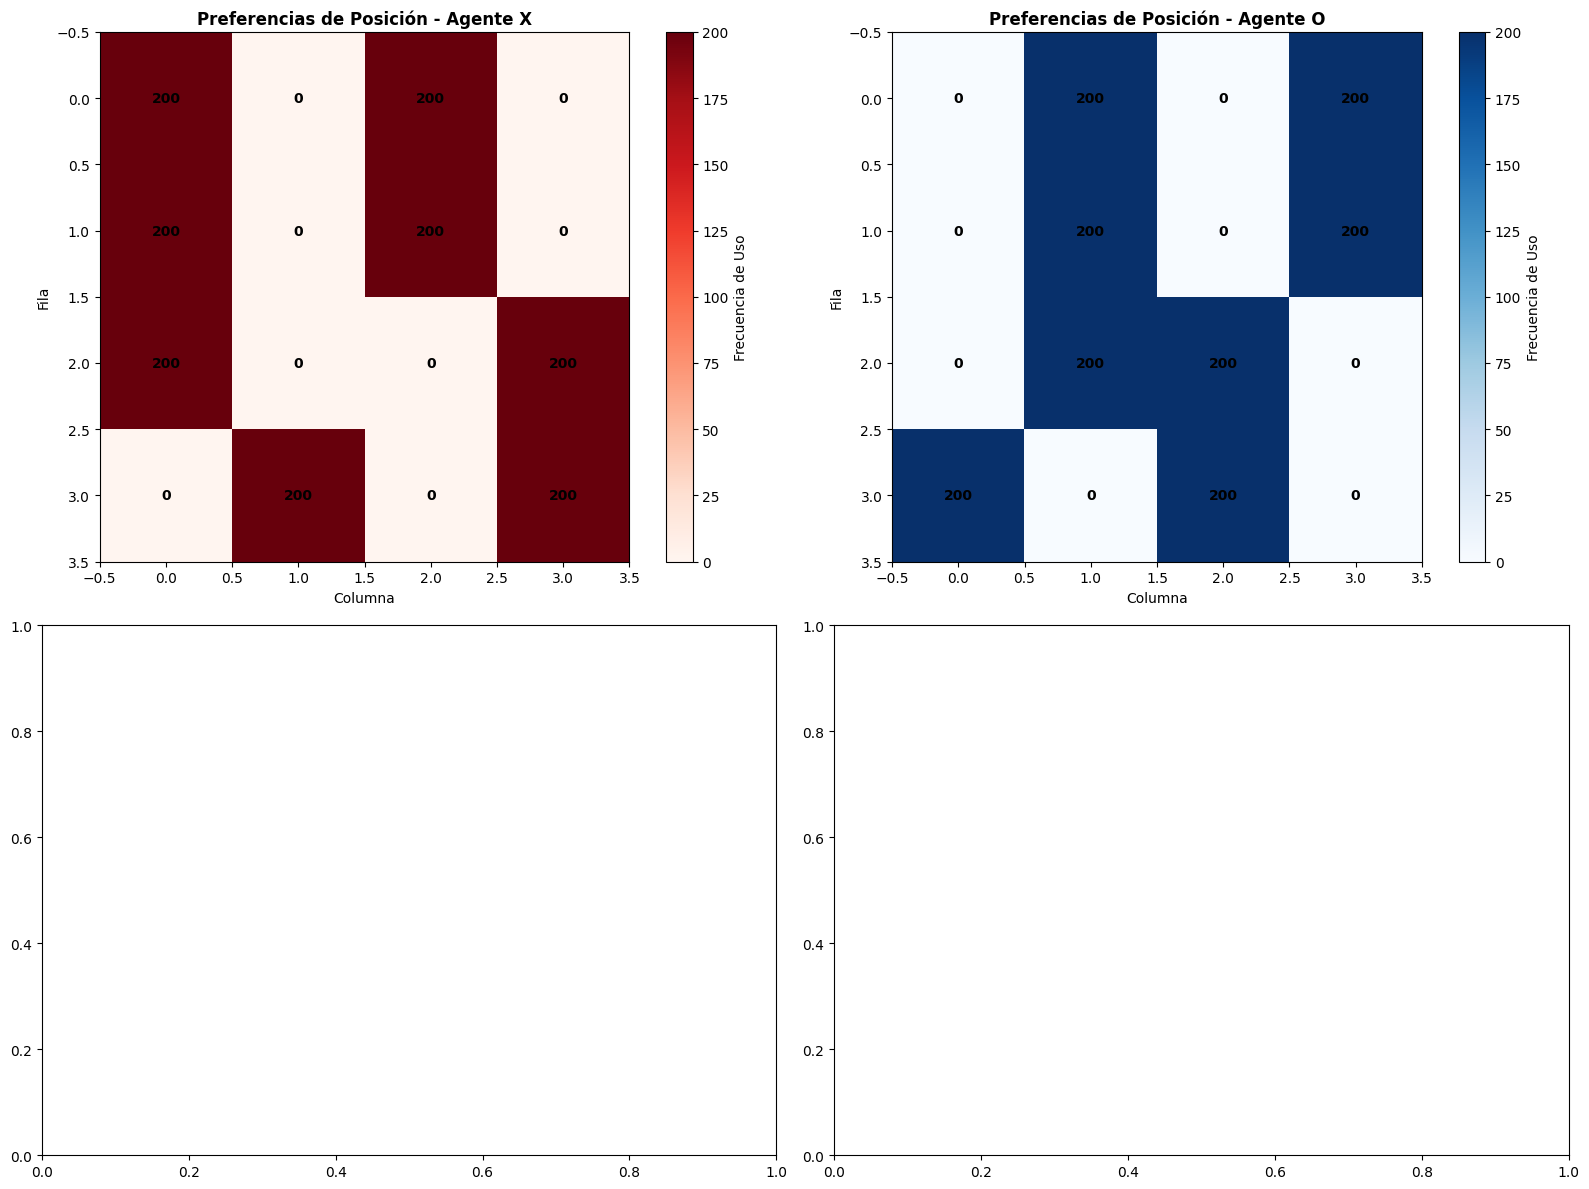

In [20]:
class GameEvaluator:
    """
    Sistema completo de evaluación para agentes entrenados
    """

    def __init__(self, agent_x, agent_o):
        self.agent_x = agent_x
        self.agent_o = agent_o

    def evaluate_agents(self, num_games=1000, verbose=False):
        """
        Evalúa el rendimiento de los agentes sin entrenamiento
        """
        results = {'X': 0, 'O': 0, 'Draw': 0}
        game_lengths = []

        print(f"🔍 Evaluando agentes en {num_games:,} juegos...")

        for i in tqdm(range(num_games), desc="Evaluación"):
            env = TrainingEnvironment(self.agent_x, self.agent_o)
            episode_result = env.play_episode(training=False, verbose=False)

            winner = episode_result['winner']
            if winner == 1:
                results['X'] += 1
            elif winner == -1:
                results['O'] += 1
            else:
                results['Draw'] += 1

            game_lengths.append(episode_result['total_moves'])

        # Calcular estadísticas
        total_games = sum(results.values())
        win_rates = {k: v/total_games*100 for k, v in results.items()}
        avg_game_length = np.mean(game_lengths)

        print(f"\n📊 Resultados de Evaluación:")
        print(f"  Agente X: {results['X']:,} victorias ({win_rates['X']:.1f}%)")
        print(f"  Agente O: {results['O']:,} victorias ({win_rates['O']:.1f}%)")
        print(f"  Empates: {results['Draw']:,} ({win_rates['Draw']:.1f}%)")
        print(f"  Duración promedio: {avg_game_length:.1f} movimientos")

        return results, win_rates, game_lengths

    def play_interactive_game(self, human_player='X'):
        """
        Permite a un humano jugar contra el agente
        """
        game = TicTacToe4x4()
        human_id = 1 if human_player == 'X' else -1
        agent = self.agent_x if human_id == -1 else self.agent_o  # Agente juega el otro

        print(f"🎮 ¡Juego Interactivo! Eres el jugador {human_player}")
        print("Introduce tu movimiento como 'fila,columna' (0-3 para ambos)")

        game.render("Estado Inicial")

        while not game.game_over:
            if game.current_player == human_id:
                # Turno del humano
                valid_actions = game.get_valid_actions()
                print(f"\nTu turno ({human_player}). Acciones válidas:")
                for i, action in enumerate(valid_actions):
                    print(f"  {i}: {action}")

                while True:
                    try:
                        user_input = input("Tu movimiento (fila,columna): ").strip()
                        if ',' in user_input:
                            row, col = map(int, user_input.split(','))
                            action = (row, col)
                        else:
                            # Permitir selección por índice
                            idx = int(user_input)
                            action = valid_actions[idx]

                        if action in valid_actions:
                            game.make_move(action)
                            break
                        else:
                            print("❌ Movimiento inválido. Intenta de nuevo.")
                    except (ValueError, IndexError):
                        print("❌ Formato inválido. Usa 'fila,columna' o el índice de la acción.")
            else:
                # Turno del agente
                print(f"\nTurno del Agente {'X' if game.current_player == 1 else 'O'}...")
                action = agent.choose_action(game, training=False)
                game.make_move(action)
                print(f"El agente jugó en {action}")

            game.render()

        # Resultado final
        if game.winner == human_id:
            print("🎉 ¡Felicidades! ¡Ganaste!")
        elif game.winner == 0:
            print("🤝 ¡Empate! Buen juego.")
        else:
            print("🤖 El agente ganó. ¡Mejor suerte la próxima vez!")

    def analyze_agent_strategy(self, num_analysis_games=100):
        """
        Analiza las estrategias aprendidas por los agentes
        """
        print("🧠 Analizando estrategias de los agentes...")

        # Recopilar estadísticas de movimientos
        position_preferences = {
            'X': np.zeros((4, 4)),
            'O': np.zeros((4, 4))
        }

        opening_moves = {'X': [], 'O': []}

        for _ in tqdm(range(num_analysis_games), desc="Análisis de estrategia"):
            env = TrainingEnvironment(self.agent_x, self.agent_o)
            episode_result = env.play_episode(training=False)

            for move in episode_result['moves']:
                player_symbol = 'X' if move['player'] == 1 else 'O'
                row, col = move['action']
                position_preferences[player_symbol][row, col] += 1

                # Primer movimiento de cada jugador
                if len([m for m in episode_result['moves'] if m['player'] == move['player']]) == 1:
                    opening_moves[player_symbol].append(move['action'])

        self._plot_strategy_analysis(position_preferences, opening_moves)

        return position_preferences, opening_moves

    def _plot_strategy_analysis(self, position_preferences, opening_moves):
        """Visualiza el análisis de estrategias"""

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Mapas de calor de preferencias de posición
        im1 = ax1.imshow(position_preferences['X'], cmap='Reds', aspect='equal')
        ax1.set_title('Preferencias de Posición - Agente X', fontweight='bold')
        ax1.set_xlabel('Columna')
        ax1.set_ylabel('Fila')

        # Agregar valores en el mapa de calor
        for i in range(4):
            for j in range(4):
                ax1.text(j, i, f'{int(position_preferences["X"][i, j])}',
                        ha='center', va='center', fontweight='bold')

        plt.colorbar(im1, ax=ax1, label='Frecuencia de Uso')

        im2 = ax2.imshow(position_preferences['O'], cmap='Blues', aspect='equal')
        ax2.set_title('Preferencias de Posición - Agente O', fontweight='bold')
        ax2.set_xlabel('Columna')
        ax2.set_ylabel('Fila')

        for i in range(4):
            for j in range(4):
                ax2.text(j, i, f'{int(position_preferences["O"][i, j])}',
                        ha='center', va='center', fontweight='bold')

        plt.colorbar(im2, ax=ax2, label='Frecuencia de Uso')

        # Análisis de movimientos de apertura
        opening_counts_x = {}
        opening_counts_o = {}

        for move in opening_moves['X']:
            opening_counts_x[move] = opening_counts_x.get(move, 0) + 1

        for move in opening_moves['O']:
            opening_counts_o[move] = opening_counts_o.get(move, 0) + 1

        # Top movimientos de apertura para X
        if opening_counts_x:
            top_moves_x = sorted(opening_counts_x.items(), key=lambda x: x[1], reverse=True)[:5]
            moves_x, counts_x = zip(*top_moves_x)
            moves_x_str = [f'{m}' for m in moves_x]

            ax3.bar(moves_x_str, counts_x, color='red', alpha=0.7)
            ax3.set_title('Top Movimientos de Apertura - Agente X', fontweight='bold')
            ax3.set_xlabel('Posición (fila, columna)')
            ax3.set_ylabel('Frecuencia')
            plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

        # Top movimientos de apertura para O
        if opening_counts_o:
            top_moves_o = sorted(opening_counts_o.items(), key=lambda x: x[1], reverse=True)[:5]
            moves_o, counts_o = zip(*top_moves_o)
            moves_o_str = [f'{m}' for m in moves_o]

            ax4.bar(moves_o_str, counts_o, color='blue', alpha=0.7)
            ax4.set_title('Top Movimientos de Apertura - Agente O', fontweight='bold')
            ax4.set_xlabel('Posición (fila, columna)')
            ax4.set_ylabel('Frecuencia')
            plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

# Crear evaluador
evaluator = GameEvaluator(agent_x, agent_o)

# Evaluación básica
eval_results, win_rates, game_lengths = evaluator.evaluate_agents(num_games=500)

# Análisis de estrategias
position_prefs, opening_moves = evaluator.analyze_agent_strategy(num_analysis_games=200)

🎭 Demostrando 2 juegos entre agentes entrenados

DEMOSTRACIÓN 1


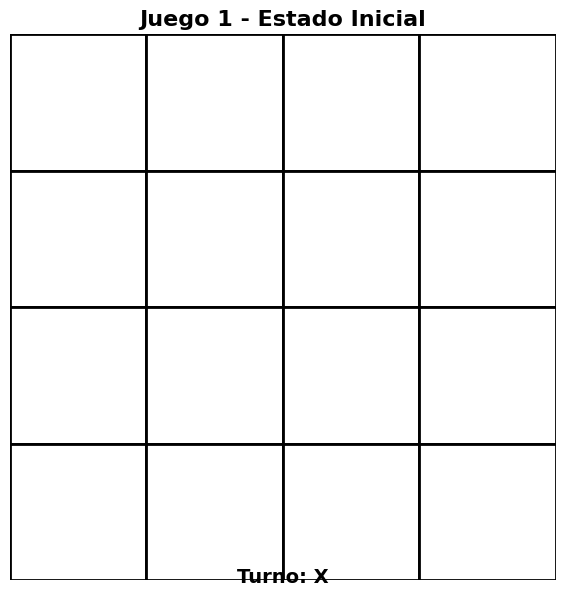


🤖 Turno del Agente X
Acciones válidas: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 0): 0.687
  (0, 1): 0.000
  (0, 2): 0.000
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (0, 0)


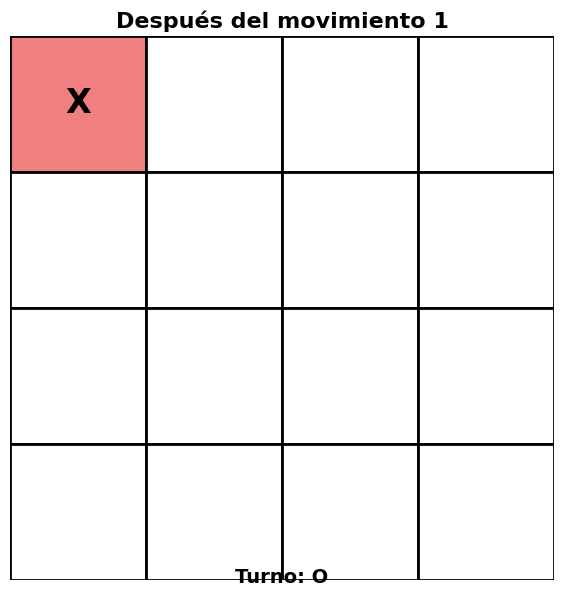


🤖 Turno del Agente O
Acciones válidas: [(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 1): 0.655
  (0, 2): 0.000
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (0, 1)


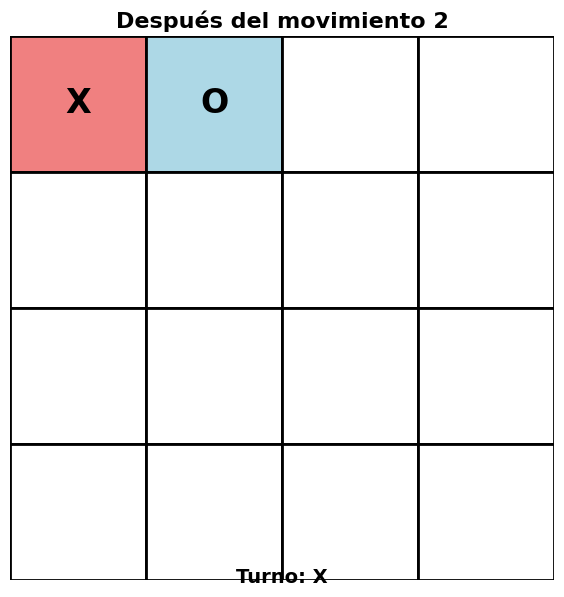


🤖 Turno del Agente X
Acciones válidas: [(0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 2): 0.733
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (0, 2)


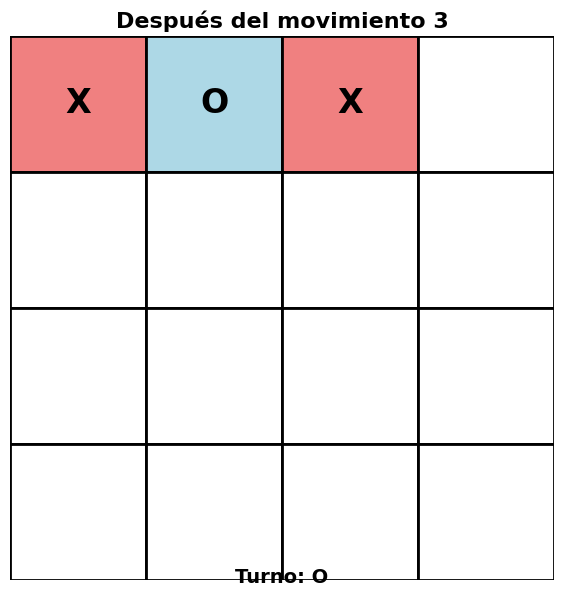


🤖 Turno del Agente O
Acciones válidas: [(0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 3): 0.723
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (0, 3)


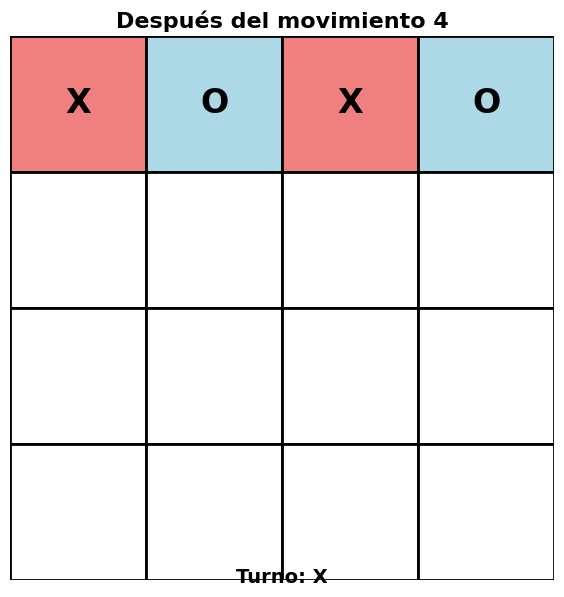


🤖 Turno del Agente X
Acciones válidas: [(1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 0): 0.776
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (1, 0)


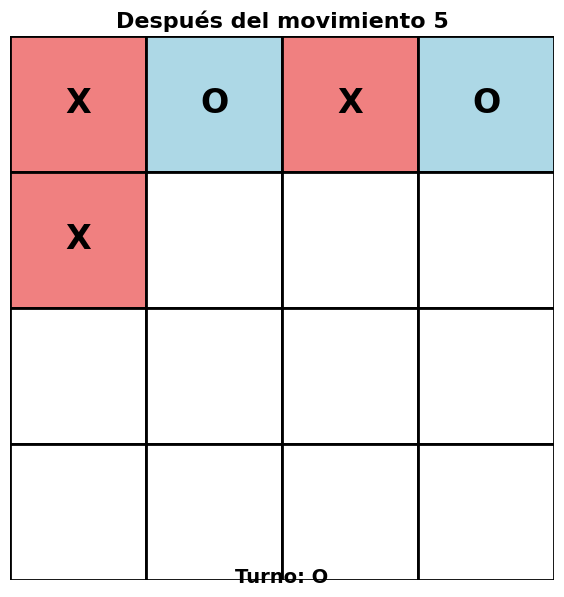


🤖 Turno del Agente O
Acciones válidas: [(1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 1): 0.780
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (1, 1)


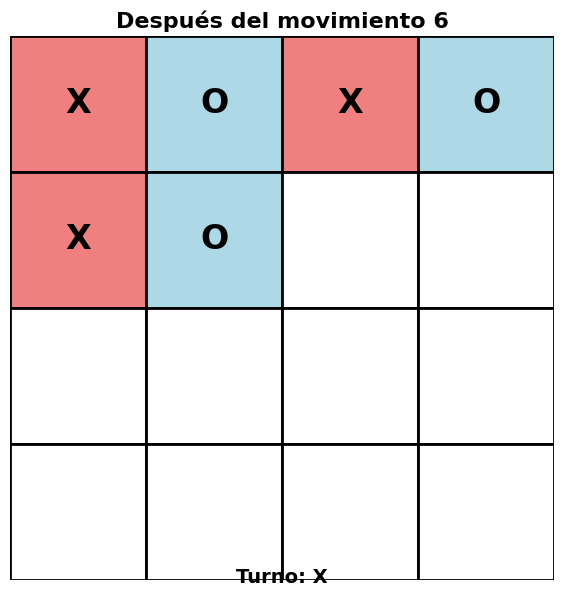


🤖 Turno del Agente X
Acciones válidas: [(1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 2): 0.806
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (1, 2)


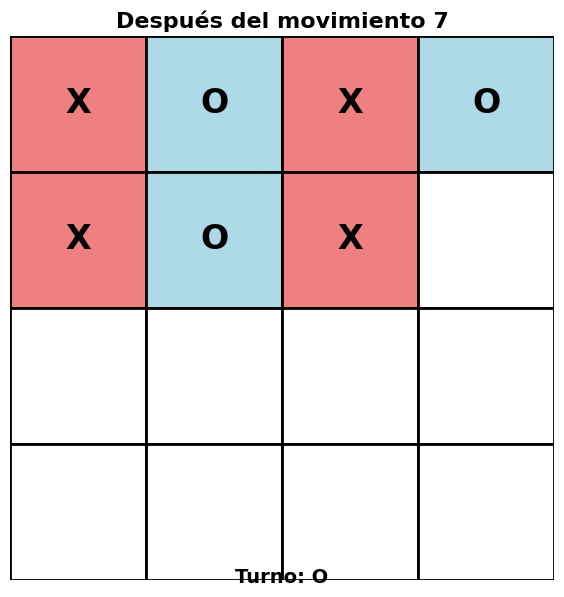


🤖 Turno del Agente O
Acciones válidas: [(1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 3): 0.821
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (1, 3)


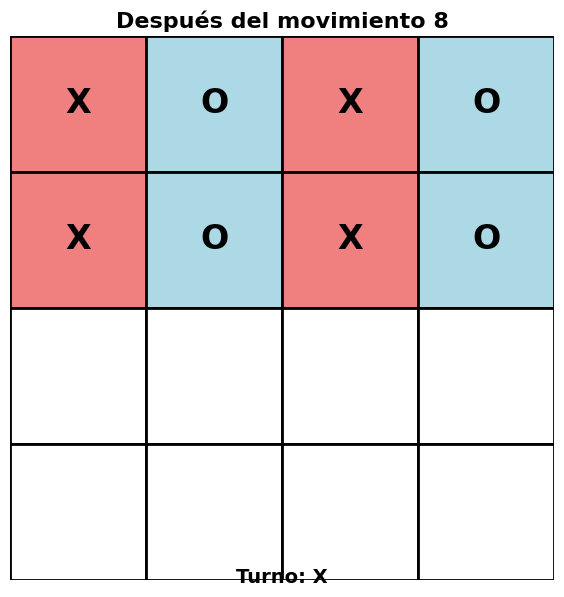


🤖 Turno del Agente X
Acciones válidas: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 0): 0.834
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (2, 0)


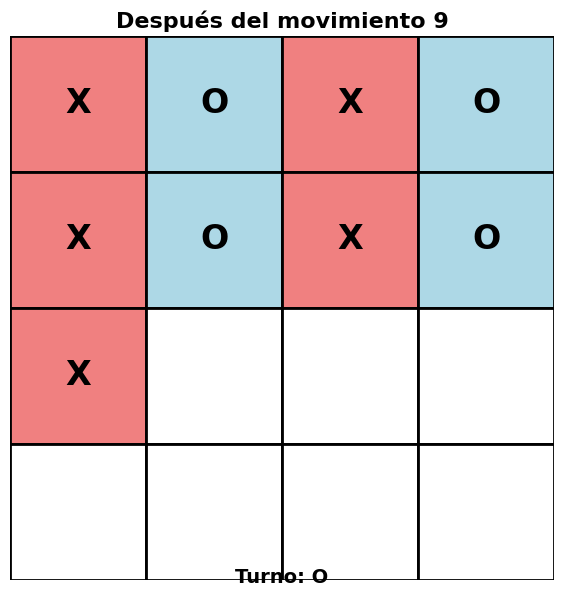


🤖 Turno del Agente O
Acciones válidas: [(2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): -3.340
  (2, 2): -1.521
  (2, 3): -1.820
  (3, 0): 0.860
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.001
✅ Agente O eligió: (3, 0)


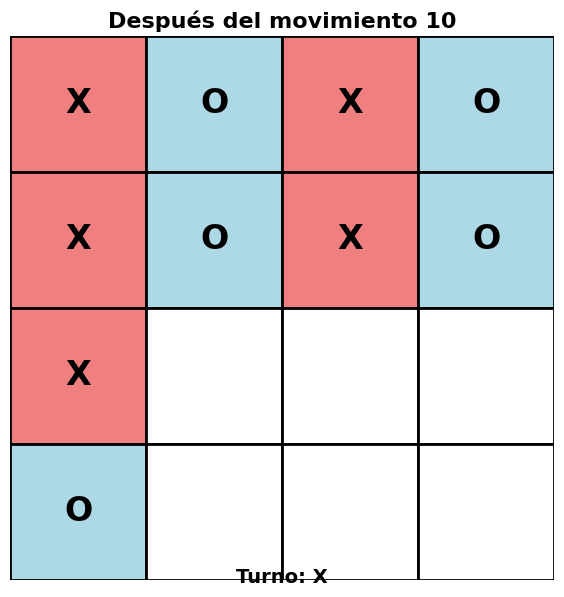


🤖 Turno del Agente X
Acciones válidas: [(2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): 0.002
  (2, 2): 0.000
  (2, 3): 0.887
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (2, 3)


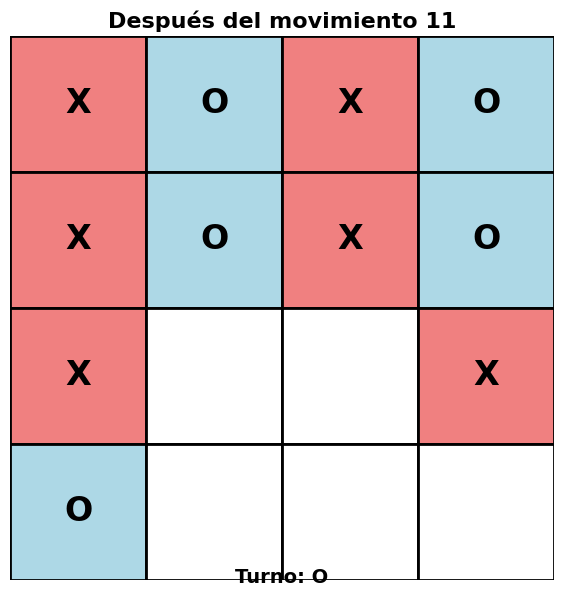


🤖 Turno del Agente O
Acciones válidas: [(2, 1), (2, 2), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): 0.903
  (2, 2): 0.157
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.021
✅ Agente O eligió: (2, 1)


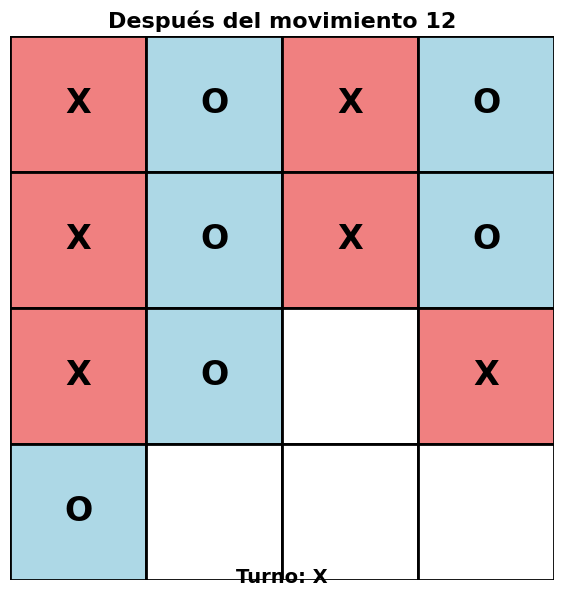


🤖 Turno del Agente X
Acciones válidas: [(2, 2), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 2): -2.884
  (3, 1): 0.950
  (3, 2): -0.225
  (3, 3): 0.000
✅ Agente X eligió: (3, 1)


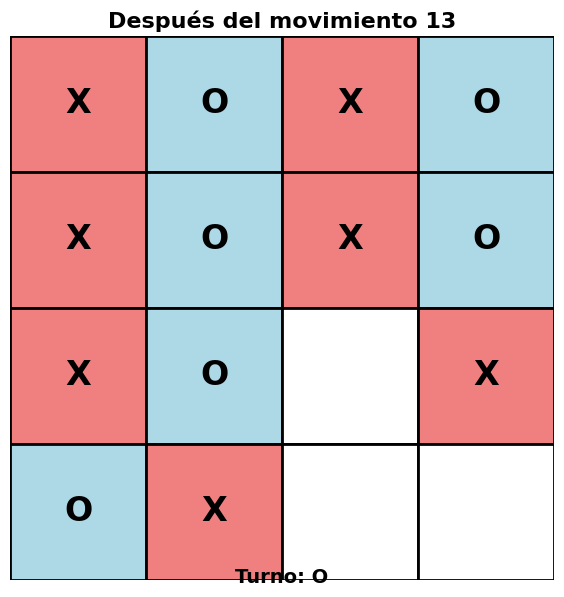


🤖 Turno del Agente O
Acciones válidas: [(2, 2), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 2): 0.950
  (3, 2): 0.093
  (3, 3): 0.018
✅ Agente O eligió: (2, 2)


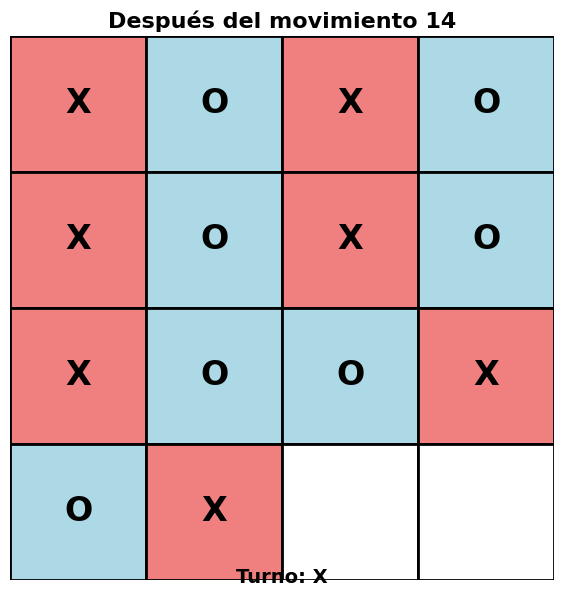


🤖 Turno del Agente X
Acciones válidas: [(3, 2), (3, 3)]
Valores Q para acciones válidas:
  (3, 2): 0.469
  (3, 3): 1.000
✅ Agente X eligió: (3, 3)


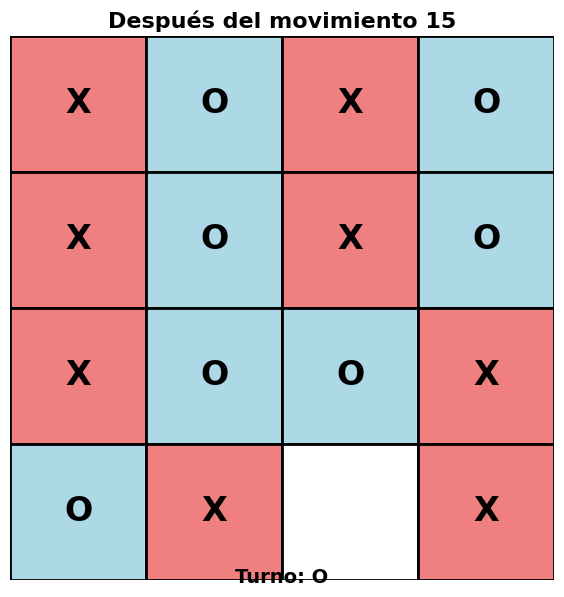


🤖 Turno del Agente O
Acciones válidas: [(3, 2)]
Valores Q para acciones válidas:
  (3, 2): 1.000
✅ Agente O eligió: (3, 2)


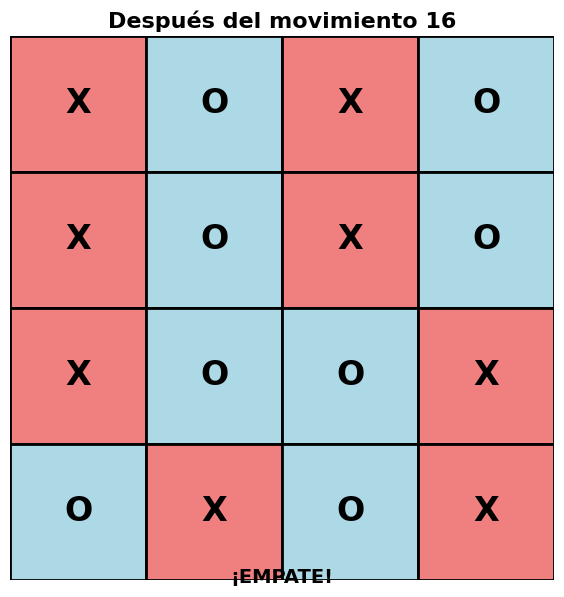

🤝 ¡Empate!
Total de movimientos: 16

DEMOSTRACIÓN 2


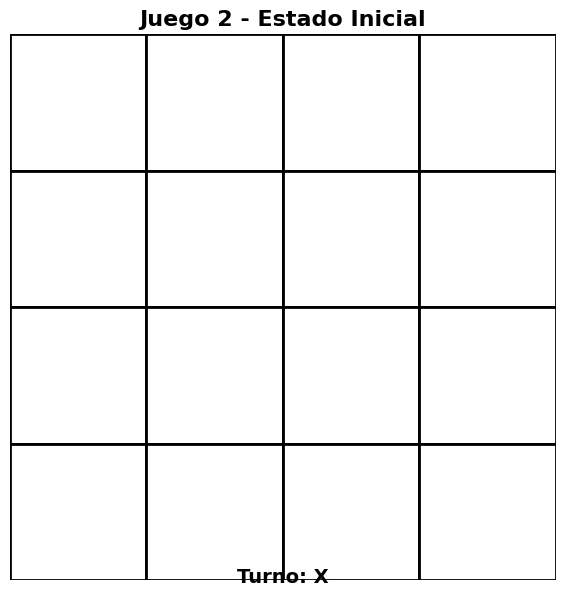


🤖 Turno del Agente X
Acciones válidas: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 0): 0.687
  (0, 1): 0.000
  (0, 2): 0.000
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (0, 0)


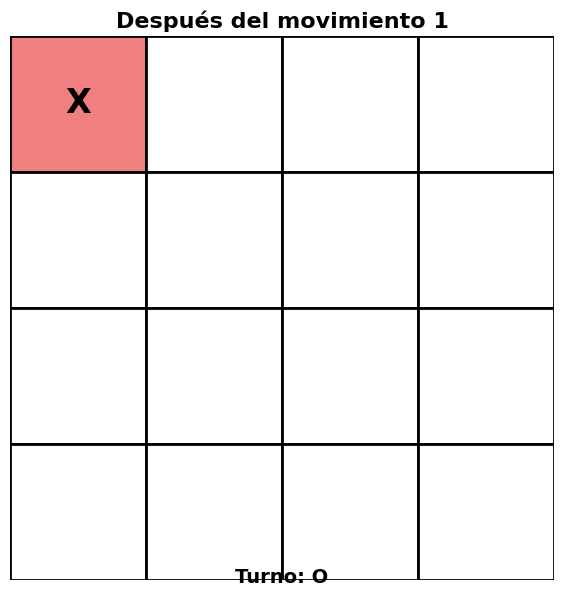


🤖 Turno del Agente O
Acciones válidas: [(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 1): 0.655
  (0, 2): 0.000
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (0, 1)


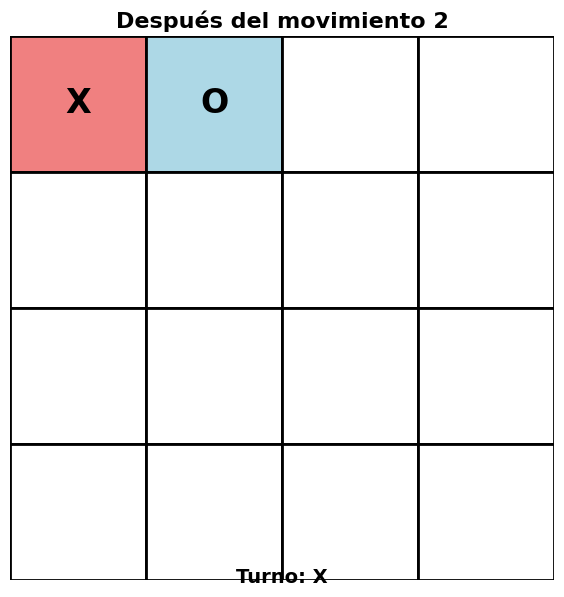


🤖 Turno del Agente X
Acciones válidas: [(0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 2): 0.733
  (0, 3): 0.000
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (0, 2)


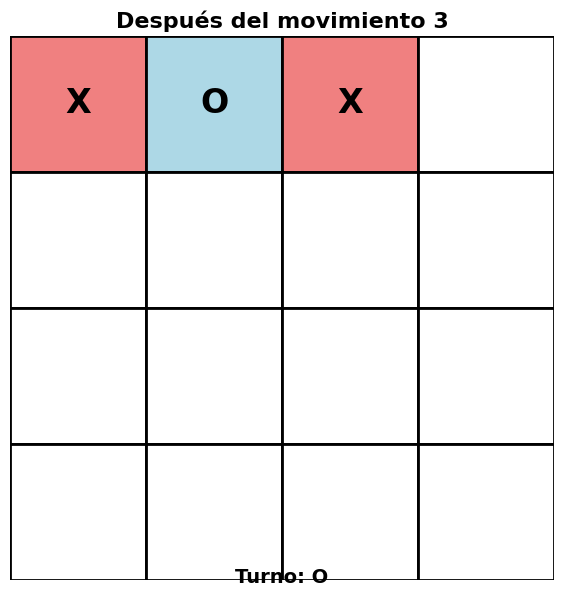


🤖 Turno del Agente O
Acciones válidas: [(0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (0, 3): 0.723
  (1, 0): 0.000
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (0, 3)


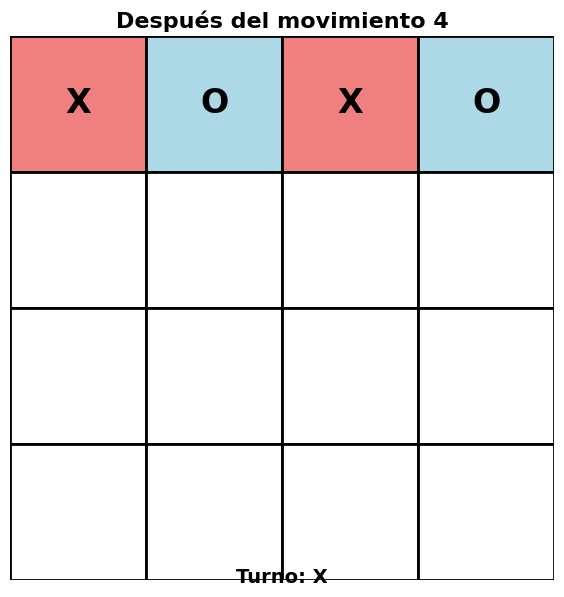


🤖 Turno del Agente X
Acciones válidas: [(1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 0): 0.776
  (1, 1): 0.000
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (1, 0)


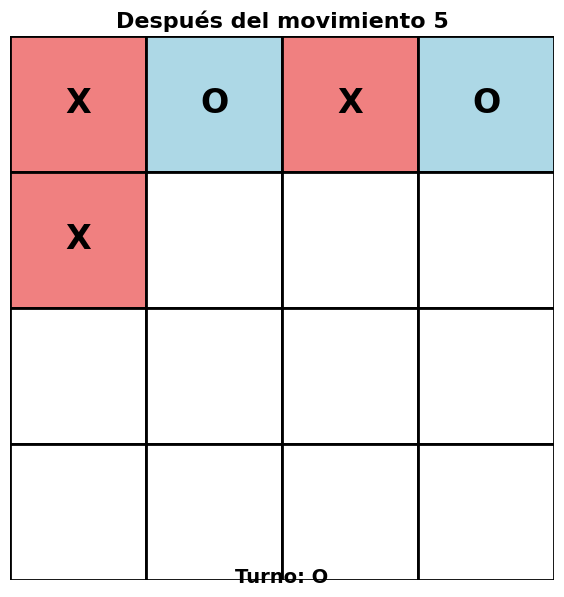


🤖 Turno del Agente O
Acciones válidas: [(1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 1): 0.780
  (1, 2): 0.000
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (1, 1)


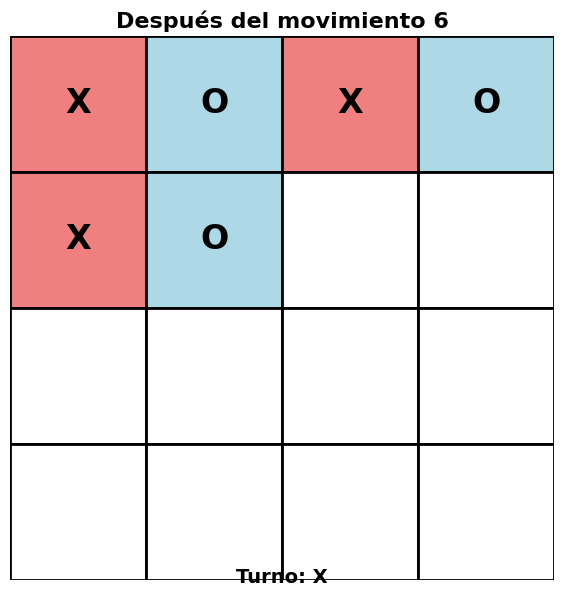


🤖 Turno del Agente X
Acciones válidas: [(1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 2): 0.806
  (1, 3): 0.000
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (1, 2)


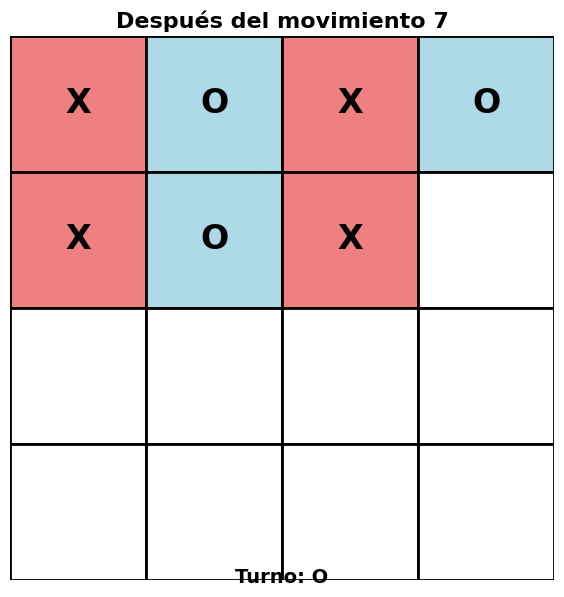


🤖 Turno del Agente O
Acciones válidas: [(1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (1, 3): 0.821
  (2, 0): 0.000
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente O eligió: (1, 3)


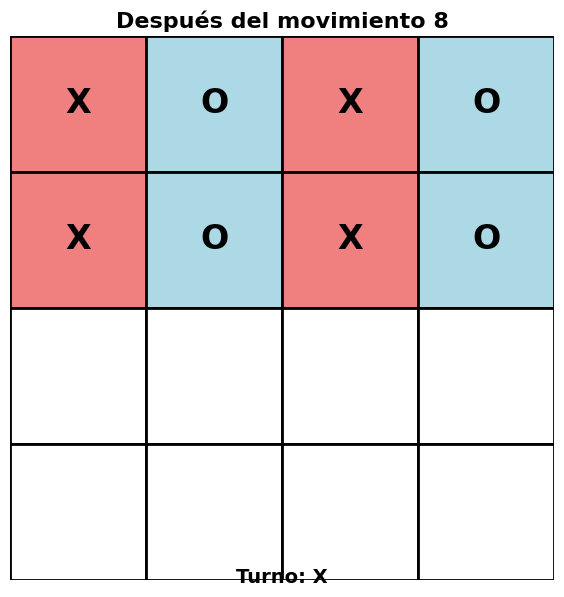


🤖 Turno del Agente X
Acciones válidas: [(2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 0): 0.834
  (2, 1): 0.000
  (2, 2): 0.000
  (2, 3): 0.000
  (3, 0): 0.000
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (2, 0)


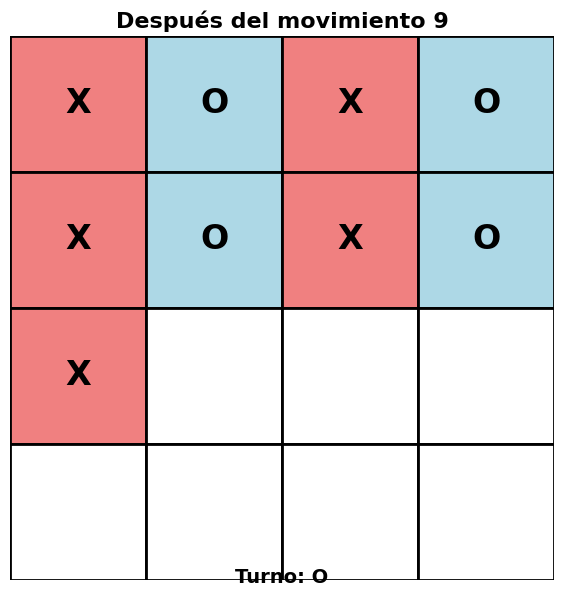


🤖 Turno del Agente O
Acciones válidas: [(2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): -3.340
  (2, 2): -1.521
  (2, 3): -1.820
  (3, 0): 0.860
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.001
✅ Agente O eligió: (3, 0)


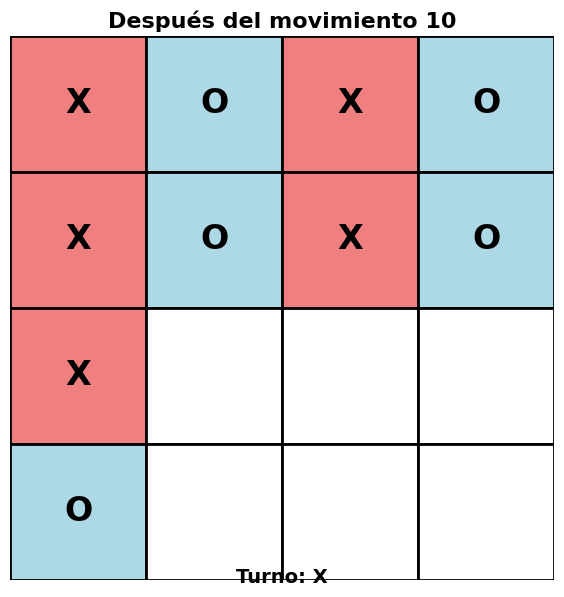


🤖 Turno del Agente X
Acciones válidas: [(2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): 0.002
  (2, 2): 0.000
  (2, 3): 0.887
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.000
✅ Agente X eligió: (2, 3)


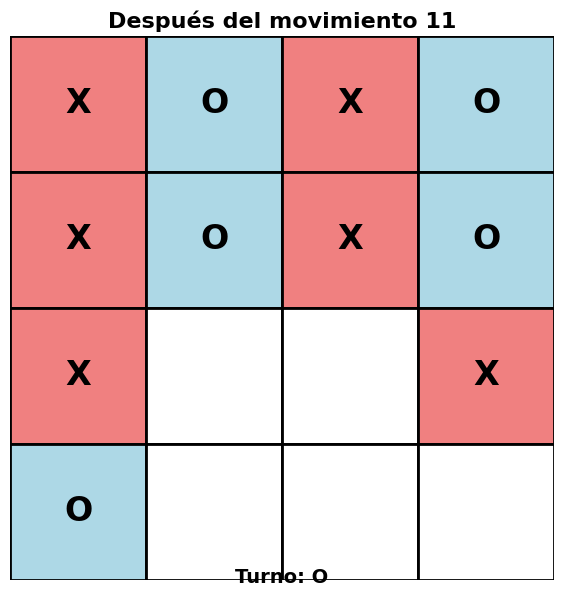


🤖 Turno del Agente O
Acciones válidas: [(2, 1), (2, 2), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 1): 0.903
  (2, 2): 0.157
  (3, 1): 0.000
  (3, 2): 0.000
  (3, 3): 0.021
✅ Agente O eligió: (2, 1)


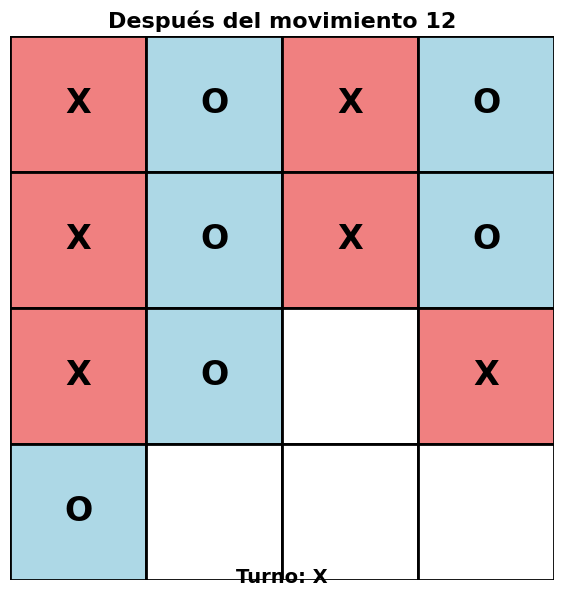


🤖 Turno del Agente X
Acciones válidas: [(2, 2), (3, 1), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 2): -2.884
  (3, 1): 0.950
  (3, 2): -0.225
  (3, 3): 0.000
✅ Agente X eligió: (3, 1)


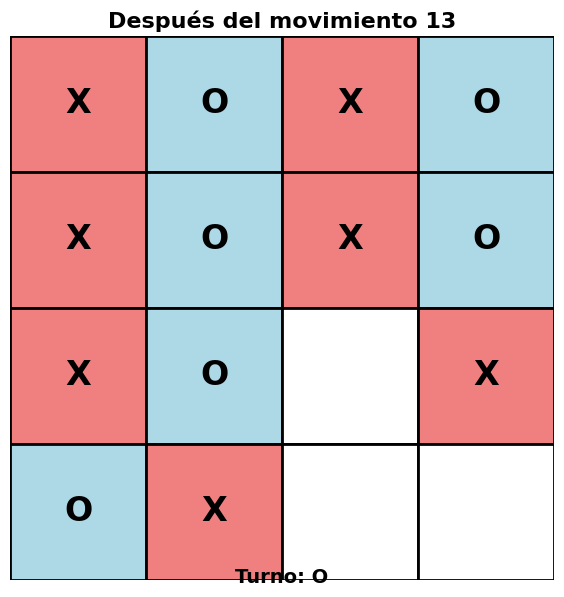


🤖 Turno del Agente O
Acciones válidas: [(2, 2), (3, 2), (3, 3)]
Valores Q para acciones válidas:
  (2, 2): 0.950
  (3, 2): 0.093
  (3, 3): 0.018
✅ Agente O eligió: (2, 2)


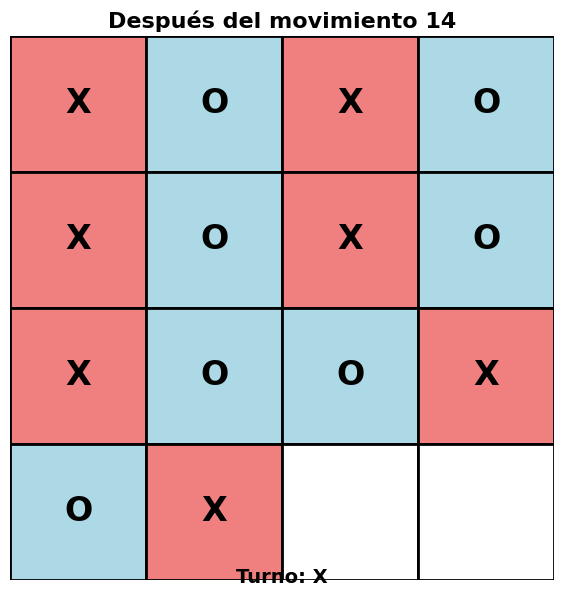


🤖 Turno del Agente X
Acciones válidas: [(3, 2), (3, 3)]
Valores Q para acciones válidas:
  (3, 2): 0.469
  (3, 3): 1.000
✅ Agente X eligió: (3, 3)


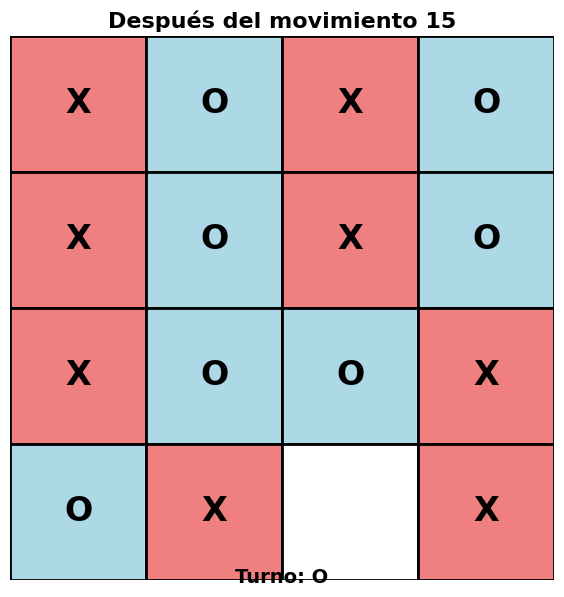


🤖 Turno del Agente O
Acciones válidas: [(3, 2)]
Valores Q para acciones válidas:
  (3, 2): 1.000
✅ Agente O eligió: (3, 2)


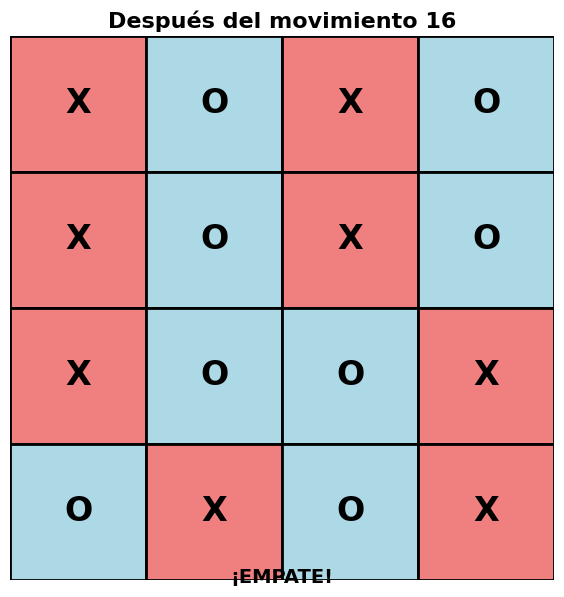

🤝 ¡Empate!
Total de movimientos: 16


In [21]:
def demonstrate_agent_gameplay(agent_x, agent_o, num_demos=3):
    """
    Demuestra cómo juegan los agentes entrenados
    """
    print(f"🎭 Demostrando {num_demos} juegos entre agentes entrenados")

    for game_num in range(num_demos):
        print(f"\n{'='*50}")
        print(f"DEMOSTRACIÓN {game_num + 1}")
        print(f"{'='*50}")

        env = TrainingEnvironment(agent_x, agent_o)
        game = TicTacToe4x4()

        move_count = 0
        game.render(f"Juego {game_num + 1} - Estado Inicial")

        while not game.game_over:
            current_agent = agent_x if game.current_player == 1 else agent_o
            player_name = 'X' if game.current_player == 1 else 'O'

            # Mostrar información del agente
            valid_actions = game.get_valid_actions()
            current_state = game.get_state()

            print(f"\n🤖 Turno del Agente {player_name}")
            print(f"Acciones válidas: {valid_actions}")

            # Mostrar valores Q para todas las acciones válidas
            print("Valores Q para acciones válidas:")
            q_values = []
            for action in valid_actions:
                state_action_key = current_agent.get_state_key(current_state, action)
                q_value = current_agent.q_table[state_action_key]
                q_values.append((action, q_value))
                print(f"  {action}: {q_value:.3f}")

            # Elegir acción
            action = current_agent.choose_action(game, training=False)
            game.make_move(action)
            move_count += 1

            print(f"✅ Agente {player_name} eligió: {action}")
            game.render(f"Después del movimiento {move_count}")

            # Pausa para lectura (en notebook real, esto sería más visual)
            if move_count < 10:  # Evitar juegos muy largos en demo
                pass

        # Resultado final
        if game.winner == 1:
            print("🏆 ¡El Agente X ganó!")
        elif game.winner == -1:
            print("🏆 ¡El Agente O ganó!")
        else:
            print("🤝 ¡Empate!")

        print(f"Total de movimientos: {move_count}")

# Ejecutar demostración
demonstrate_agent_gameplay(agent_x, agent_o, num_demos=2)

🧪 Iniciando experimento de hiperparámetros...

🧮 Probando: Configuración Base
   α=0.1, γ=0.95, decay=0.995
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 173.26it/s, ε_X=0.010, ε_O=0.010, Win%=X:0.6 O:0.3 D:99.1]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 144 (7.2%)
  O ganó: 122 (6.1%)
  Empates: 1,734 (86.7%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:01<00:00, 191.64it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Alpha Alto
   α=0.3, γ=0.95, decay=0.995
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 178.70it/s, ε_X=0.010, ε_O=0.010, Win%=X:0.9 O:0.6 D:98.5]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 144 (7.2%)
  O ganó: 115 (5.8%)
  Empates: 1,741 (87.1%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:00<00:00, 201.93it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Alpha Bajo
   α=0.05, γ=0.95, decay=0.995
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 175.50it/s, ε_X=0.010, ε_O=0.010, Win%=X:1.0 O:0.3 D:98.7]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 150 (7.5%)
  O ganó: 124 (6.2%)
  Empates: 1,726 (86.3%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:00<00:00, 200.74it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Gamma Alto
   α=0.1, γ=0.99, decay=0.995
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 175.52it/s, ε_X=0.010, ε_O=0.010, Win%=X:0.9 O:0.4 D:98.7]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 147 (7.3%)
  O ganó: 98 (4.9%)
  Empates: 1,755 (87.8%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:01<00:00, 184.53it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Gamma Bajo
   α=0.1, γ=0.8, decay=0.995
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 179.15it/s, ε_X=0.010, ε_O=0.010, Win%=X:1.3 O:0.5 D:98.2]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 141 (7.0%)
  O ganó: 104 (5.2%)
  Empates: 1,755 (87.8%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:00<00:00, 246.99it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Decaimiento Rápido
   α=0.1, γ=0.95, decay=0.99
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:11<00:00, 178.87it/s, ε_X=0.010, ε_O=0.010, Win%=X:1.5 O:0.6 D:97.9]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 92 (4.6%)
  O ganó: 68 (3.4%)
  Empates: 1,840 (92.0%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:00<00:00, 212.95it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos

🧮 Probando: Decaimiento Lento
   α=0.1, γ=0.95, decay=0.999
🚀 Iniciando entrenamiento para 2,000 episodios...


Entrenamiento: 100%|██████████| 2000/2000 [00:10<00:00, 185.86it/s, ε_X=0.149, ε_O=0.149, Win%=X:26.9 O:21.3 D:51.8]



✅ Entrenamiento completado!
Resultados finales:
  X ganó: 549 (27.5%)
  O ganó: 475 (23.8%)
  Empates: 976 (48.8%)
🔍 Evaluando agentes en 200 juegos...


Evaluación: 100%|██████████| 200/200 [00:00<00:00, 211.00it/s]



📊 Resultados de Evaluación:
  Agente X: 0 victorias (0.0%)
  Agente O: 0 victorias (0.0%)
  Empates: 200 (100.0%)
  Duración promedio: 16.0 movimientos


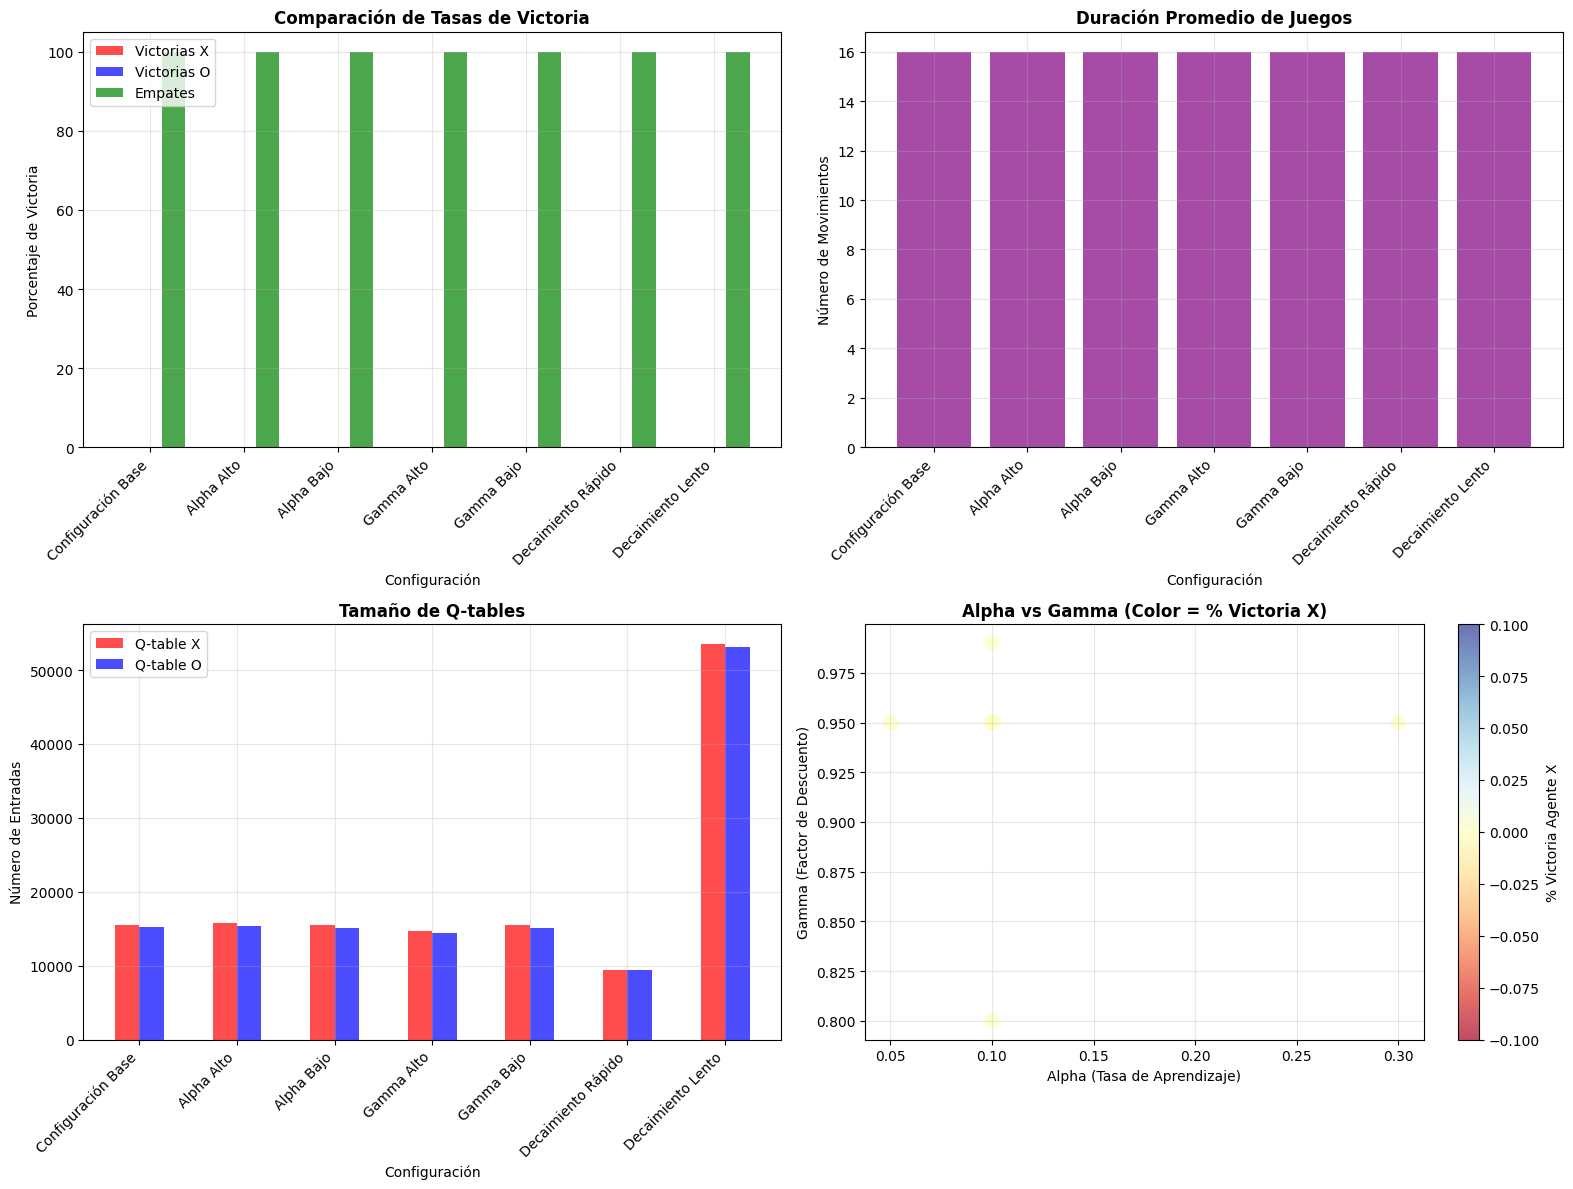

🧪 Experimento de hiperparámetros configurado
Descomenta la línea anterior para ejecutar el experimento completo


In [23]:
def hyperparameter_experiment():
    """
    Experimenta con diferentes combinaciones de hiperparámetros
    """
    print("🧪 Iniciando experimento de hiperparámetros...")

    # Configuraciones a probar
    configs = [
        {'alpha': 0.1, 'gamma': 0.95, 'epsilon_decay': 0.995, 'name': 'Configuración Base'},
        {'alpha': 0.3, 'gamma': 0.95, 'epsilon_decay': 0.995, 'name': 'Alpha Alto'},
        {'alpha': 0.05, 'gamma': 0.95, 'epsilon_decay': 0.995, 'name': 'Alpha Bajo'},
        {'alpha': 0.1, 'gamma': 0.99, 'epsilon_decay': 0.995, 'name': 'Gamma Alto'},
        {'alpha': 0.1, 'gamma': 0.8, 'epsilon_decay': 0.995, 'name': 'Gamma Bajo'},
        {'alpha': 0.1, 'gamma': 0.95, 'epsilon_decay': 0.99, 'name': 'Decaimiento Rápido'},
        {'alpha': 0.1, 'gamma': 0.95, 'epsilon_decay': 0.999, 'name': 'Decaimiento Lento'},
    ]

    results = []

    for config in configs:
        print(f"\n🧮 Probando: {config['name']}")
        print(f"   α={config['alpha']}, γ={config['gamma']}, decay={config['epsilon_decay']}")

        # Crear agentes con la configuración actual
        test_agent_x = QLearningAgent(
            player_id=1,
            alpha=config['alpha'],
            gamma=config['gamma'],
            epsilon_decay=config['epsilon_decay']
        )
        test_agent_o = QLearningAgent(
            player_id=-1,
            alpha=config['alpha'],
            gamma=config['gamma'],
            epsilon_decay=config['epsilon_decay']
        )

        # Entrenar por un número moderado de episodios
        test_env = TrainingEnvironment(test_agent_x, test_agent_o)
        training_results = test_env.train(episodes=2000, eval_frequency=2000, save_frequency=10000)

        # Evaluar rendimiento
        evaluator = GameEvaluator(test_agent_x, test_agent_o)
        eval_results, win_rates, game_lengths = evaluator.evaluate_agents(num_games=200, verbose=False)

        # Guardar resultados
        result = {
            'config': config,
            'training_results': training_results,
            'win_rates': win_rates,
            'avg_game_length': np.mean(game_lengths),
            'q_table_size_x': len(test_agent_x.q_table),
            'q_table_size_o': len(test_agent_o.q_table)
        }
        results.append(result)

    # Visualizar comparación
    plot_hyperparameter_comparison(results)

    return results

def plot_hyperparameter_comparison(results):
    """Visualiza la comparación de hiperparámetros"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    config_names = [r['config']['name'] for r in results]

    # 1. Tasas de victoria
    x_wins = [r['win_rates']['X'] for r in results]
    o_wins = [r['win_rates']['O'] for r in results]
    draws = [r['win_rates']['Draw'] for r in results]

    x = np.arange(len(config_names))
    width = 0.25

    ax1.bar(x - width, x_wins, width, label='Victorias X', color='red', alpha=0.7)
    ax1.bar(x, o_wins, width, label='Victorias O', color='blue', alpha=0.7)
    ax1.bar(x + width, draws, width, label='Empates', color='green', alpha=0.7)

    ax1.set_title('Comparación de Tasas de Victoria', fontweight='bold')
    ax1.set_xlabel('Configuración')
    ax1.set_ylabel('Porcentaje de Victoria')
    ax1.set_xticks(x)
    ax1.set_xticklabels(config_names, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Duración promedio de juegos
    avg_lengths = [r['avg_game_length'] for r in results]
    ax2.bar(config_names, avg_lengths, color='purple', alpha=0.7)
    ax2.set_title('Duración Promedio de Juegos', fontweight='bold')
    ax2.set_xlabel('Configuración')
    ax2.set_ylabel('Número de Movimientos')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    # 3. Tamaño de Q-tables
    qtable_sizes_x = [r['q_table_size_x'] for r in results]
    qtable_sizes_o = [r['q_table_size_o'] for r in results]

    ax3.bar(x - width/2, qtable_sizes_x, width, label='Q-table X', color='red', alpha=0.7)
    ax3.bar(x + width/2, qtable_sizes_o, width, label='Q-table O', color='blue', alpha=0.7)

    ax3.set_title('Tamaño de Q-tables', fontweight='bold')
    ax3.set_xlabel('Configuración')
    ax3.set_ylabel('Número de Entradas')
    ax3.set_xticks(x)
    ax3.set_xticklabels(config_names, rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Parámetros alpha y gamma
    alphas = [r['config']['alpha'] for r in results]
    gammas = [r['config']['gamma'] for r in results]

    ax4.scatter(alphas, gammas, s=100, c=x_wins, cmap='RdYlBu', alpha=0.7)
    ax4.set_title('Alpha vs Gamma (Color = % Victoria X)', fontweight='bold')
    ax4.set_xlabel('Alpha (Tasa de Aprendizaje)')
    ax4.set_ylabel('Gamma (Factor de Descuento)')
    ax4.grid(True, alpha=0.3)

    # Colorbar para el scatter plot
    cbar = plt.colorbar(ax4.collections[0], ax=ax4)
    cbar.set_label('% Victoria Agente X')

    plt.tight_layout()
    plt.show()

# Ejecutar experimento (comentado para demo rápida)
experiment_results = hyperparameter_experiment()

print("🧪 Experimento de hiperparámetros configurado")